In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!unzip /content/drive/MyDrive/Colab_Checkpoints.zip
#!mv Colab_Checkpoints /content/drive/MyDrive

In [2]:
!unzip /content/drive/MyDrive/MayoDataset.zip

Archive:  /content/drive/MyDrive/MayoDataset.zip
  inflating: Mayo_s Dataset/test/C081/307.png  
  inflating: Mayo_s Dataset/test/C081/303.png  
  inflating: Mayo_s Dataset/test/C081/321.png  
  inflating: Mayo_s Dataset/test/C081/315.png  
  inflating: Mayo_s Dataset/test/C081/300.png  
  inflating: Mayo_s Dataset/test/C081/290.png  
  inflating: Mayo_s Dataset/test/C081/314.png  
  inflating: Mayo_s Dataset/test/C081/288.png  
  inflating: Mayo_s Dataset/test/C081/301.png  
  inflating: Mayo_s Dataset/test/C081/323.png  
  inflating: Mayo_s Dataset/test/C081/322.png  
  inflating: Mayo_s Dataset/test/C081/312.png  
  inflating: Mayo_s Dataset/test/C081/298.png  
  inflating: Mayo_s Dataset/test/C081/316.png  
  inflating: Mayo_s Dataset/test/C081/310.png  
  inflating: Mayo_s Dataset/test/C081/309.png  
  inflating: Mayo_s Dataset/test/C081/313.png  
  inflating: Mayo_s Dataset/test/C081/308.png  
  inflating: Mayo_s Dataset/test/C081/318.png  
  inflating: Mayo_s Dataset/test/C081/3

In [3]:
!mv Mayo_s\ Dataset MajoDataset

In [4]:
import os
import shutil
from PIL import Image

# path alla cartella MajoDataset (modifica se serve)
root_dir = '/content/MajoDataset'

for split in ['train', 'test']:
    split_dir = os.path.join(root_dir, split)
    # scorri tutte le voci dentro train/ test
    for folder_name in os.listdir(split_dir):
        folder_path = os.path.join(split_dir, folder_name)
        if os.path.isdir(folder_path):
            # per ogni file nella sottocartella
            for fname in os.listdir(folder_path):
                src = os.path.join(folder_path, fname)
                # nuovo nome = nome della cartella + '_' + nome file
                new_fname = f"{folder_name}_{fname}"
                dst = os.path.join(split_dir, new_fname)
                # gestisci eventuali collisioni
                if os.path.exists(dst):
                    base, ext = os.path.splitext(new_fname)
                    i = 1
                    while True:
                        candidate = f"{base}_{i}{ext}"
                        candidate_path = os.path.join(split_dir, candidate)
                        if not os.path.exists(candidate_path):
                            dst = candidate_path
                            break
                        i += 1
                # sposta il file
                shutil.move(src, dst)

                # --- RESIZE DELL'IMMAGINE ---
                try:
                    with Image.open(dst) as img:
                        img = img.convert("RGB")  # garantiamo che sia RGB
                        img = img.resize((256, 256), Image.LANCZOS)
                        img.save(dst)
                except Exception as e:
                    print(f"Errore nel processare {dst}: {e}")

            # elimina la sottocartella vuota
            os.rmdir(folder_path)

print("Operazione completata! Tutti i file sono stati spostati, rinominati e resizzati a 256x256.")


Errore nel processare /content/MajoDataset/train/C027_C002 - Copia (4): [Errno 21] Is a directory: '/content/MajoDataset/train/C027_C002 - Copia (4)'
Operazione completata! Tutti i file sono stati spostati, rinominati e resizzati a 256x256.


In [5]:
# 1. (Opzionale) Disinstalla i pacchetti non necessari per ridurre conflitti
!pip uninstall -y thinc langchain-core

# 2. Reinstalla la versione compatibile di NumPy
!pip uninstall -y numpy
!pip install "numpy==1.24.3"
!pip install "scipy<1.13" # ODL needs older numpy/scipy currently

# 3. Installa le altre librerie
!pip install astra-toolbox torch torchvision torchaudio
!pip install https://github.com/adler-j/adler/archive/master.zip
!pip install jedi


!pip install scikit-image Pillow

# 4. (Opzionale) Forza il downgrade di packaging se langchain-core è necessario
!pip install packaging==24.0

# 5. Installa ODL forzando la reinstallazione
!pip install https://github.com/odlgroup/odl/archive/master.zip

# Nota: Riavvia il runtime dopo queste operazioni.


Found existing installation: thinc 8.3.6
Uninstalling thinc-8.3.6:
  Successfully uninstalled thinc-8.3.6
Found existing installation: langchain-core 0.3.55
Uninstalling langchain-core-0.3.55:
  Successfully uninstalled langchain-core-0.3.55
Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 77.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 3.8.5 requires thinc<8.4.0,>=8.3.4, which is not installed.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 13.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at

In [1]:
import os, shutil
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import astra
import numpy as np
from PIL import Image
import cv2
import torch.nn.functional as F
import odl
#import odl.contrib.tensorflow
import torch.optim as optim
from skimage.metrics import peak_signal_noise_ratio as psnr # For evaluation metric
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import random
import time
import traceback # For detailed error printin
from odl.contrib.torch import OperatorModule
import pandas as pd

#codice con la Unet residuale "leggera" - CHECKPOINT COMPLETO SU DRIVE

In [2]:
# =============================================================================
# 1. #HYPERPARAMETERS AND INITIALIZATION
# =============================================================================

# --- MONTA GOOGLE DRIVE ---
try:
    from google.colab import drive
    drive.mount('/content/drive')
    drive_mounted = True
    print("Google Drive montato con successo.")
except ImportError:
    print("Google Colab 'drive' non trovato. Salverò localmente.")
    drive_mounted = False
except Exception as e:
    print(f"Errore durante il montaggio di Google Drive: {e}")
    drive_mounted = False


# --- Device Configuration ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =============================================================================
# 0. CONFIGURAZIONE DEL TRAINING RUN <<-- MODIFICA QUI !!
# =============================================================================
# Scegli la geometria: 'low_angle' o 'full_angle'
GEOMETRY_MODE = 'full_angle'  # o 'full_angle'

# Livello (frazione) di rumore DA APPLICARE *QUANDO* si aggiunge rumore
# (relativo a PROJ_MAX - PROJ_MIN)
NOISE_LEVEL_IF_APPLIED = 0.01 # Metti 0.0 se vuoi che anche i campioni rumorosi siano puliti (disabilita rumore)

# Probabilità (da 0.0 a 1.0) che un SINGOLO campione abbia rumore aggiunto
# 0.0 = tutti puliti
# 1.0 = tutti rumorosi (con livello NOISE_LEVEL_IF_APPLIED)
# 0.5 = circa metà puliti, metà rumorosi
NOISE_PROBABILITY = 0.5 # <--- NUOVO PARAMETRO

# --- Parametri Derivati dalla Configurazione ---
if GEOMETRY_MODE == 'low_angle':
    NUM_ANGLES_TRAIN = 30
    ANGLE_RANGE_DEG_TRAIN = [-30, 30]
    GEOMETRY_TAG = "30angles_neg30_pos30"
elif GEOMETRY_MODE == 'full_angle':
    NUM_ANGLES_TRAIN = 30 #con 180 mi va in out of memory
    ANGLE_RANGE_DEG_TRAIN = [-15, 15]
    GEOMETRY_TAG = "180angles_neg90_pos90"
else:
    raise ValueError("GEOMETRY_MODE deve essere 'low_angle' o 'full_angle'")

# Aggiorna il tag di configurazione per includere la probabilità
NOISE_TAG = f"noise{NOISE_LEVEL_IF_APPLIED:.2f}p{NOISE_PROBABILITY:.1f}".replace('.', 'p') # Es: noise0p01p0p5
CONFIG_NAME = f"{GEOMETRY_TAG}_{NOISE_TAG}"

print(f"--- CONFIGURAZIONE TRAINING RUN ---")
print(f"Geometria: {GEOMETRY_TAG}")
print(f"Livello Rumore (se applicato): {NOISE_LEVEL_IF_APPLIED}")
print(f"Probabilità Rumore per Campione: {NOISE_PROBABILITY}")
print(f"Configurazione ID: {CONFIG_NAME}")
print(f"------------------------------------")


# =============================================================================
# 1. CONFIGURATION
# =============================================================================
RECO_SIZE = 256
DETECTOR_PIXELS = int(RECO_SIZE * np.sqrt(2))

PROJ_MIN = 0.0
PROJ_MAX = 5.0  # Example maximum

# Calcolo dello standard deviation del rumore effettivo (usato QUANDO si aggiunge rumore)
NOISE_STD_DEV_ACTUAL = NOISE_LEVEL_IF_APPLIED * (PROJ_MAX - PROJ_MIN)
if NOISE_LEVEL_IF_APPLIED == 0.0:
    NOISE_STD_DEV_ACTUAL = 0.0 # Assicura sia esattamente 0
print(f"Actual noise std dev (when applied): {NOISE_STD_DEV_ACTUAL:.4f}")

# --- Parametri Modello e Training ---
N_ITER = 5
N_PRIMAL = 5
N_DUAL = 5
KERNEL_SIZE = (3, 3)
N_FEATURES = 16
UNET_DEPTH = 1

NUM_EPOCHS = 10 # Aumenta per training completo
STEPS_PER_EPOCH = 200 # Limita passi per epoca (utile per dataset grandi)
VALIDATION_STEPS = 50 # Limita passi di validazione
BATCH_SIZE = 16
LEARNING_RATE = 1e-4
CLIP_NORM = 1.0 # Valore massimo per il clipping della norma del gradiente
NUM_WORKERS = 0 # Mettere > 0 se possibile (es. 2 o 4) e non su Windows/macOS per caricamento dati parallelo


# --- PERCORSO CHECKPOINT SU DRIVE ---
# Modifica questo percorso secondo le tue preferenze su Google Drive
DRIVE_BASE_DIR  = '/content/drive/MyDrive/Colab_Checkpoints/LPD_UNET' # Esempio
CHECKPOINT_SUBDIR = f'LPD_UNET_{CONFIG_NAME}' # Sottocartella specifica
CHECKPOINT_FILENAME = f'lpd_unet_{CONFIG_NAME}.pth' # Nome file specifico

if drive_mounted:
    DRIVE_SAVE_DIR = os.path.join(DRIVE_BASE_DIR, CHECKPOINT_SUBDIR)
    try:
        os.makedirs(DRIVE_SAVE_DIR, exist_ok=True) # Crea directory se non esiste
        print(f"Saving checkpoints to Drive: {DRIVE_SAVE_DIR}")
        CHECKPOINT_PATH = os.path.join(DRIVE_SAVE_DIR, CHECKPOINT_FILENAME)
    except Exception as e:
        print(f"Warning: Could not create directory on Drive: {e}. Saving locally.")
        # Fallback a locale se creazione directory Drive fallisce
        CHECKPOINT_PATH = f'./{CHECKPOINT_FILENAME}'
else:
    # Salvataggio locale se Drive non è montato
    CHECKPOINT_PATH = f'./{CHECKPOINT_FILENAME}'

print(f"Checkpoint path set to: {CHECKPOINT_PATH}")

# =============================================================================
# 2. ODL SETUP & PyTorch wrappers (Usa parametri configurati)
# =============================================================================
print(f"--- Setting up ODL for Geometry: {GEOMETRY_TAG} ---")
# Calcola angoli in radianti
ANGLE_MIN_RAD_TRAIN = np.deg2rad(ANGLE_RANGE_DEG_TRAIN[0])
ANGLE_MAX_RAD_TRAIN = np.deg2rad(ANGLE_RANGE_DEG_TRAIN[1])

# Definisci spazi e geometria ODL
reco_space = odl.uniform_discr(
    [-RECO_SIZE/2]*2, [RECO_SIZE/2]*2, [RECO_SIZE, RECO_SIZE], dtype='float32'
)
angle_partition = odl.uniform_partition(
    ANGLE_MIN_RAD_TRAIN, ANGLE_MAX_RAD_TRAIN, NUM_ANGLES_TRAIN
)
detector_partition = odl.uniform_partition(
    -DETECTOR_PIXELS/2, DETECTOR_PIXELS/2, DETECTOR_PIXELS
)
geometry = odl.tomo.Parallel2dGeometry(angle_partition, detector_partition)
print(f"Geometry setup: {NUM_ANGLES_TRAIN} angles from {ANGLE_RANGE_DEG_TRAIN[0]}° to {ANGLE_RANGE_DEG_TRAIN[1]}°")
print(f"Detector pixels: {DETECTOR_PIXELS}")

# Crea operatori ODL RayTransform e Adjoint
# Gestione backend ASTRA (CUDA preferito, poi CPU, poi fallback ODL)
try:
    ray_trafo_odl = odl.tomo.RayTransform(reco_space, geometry, impl='astra_cuda')
    print("Using ASTRA CUDA backend.")
except Exception as e_cuda:
    print(f"ASTRA CUDA backend failed ({e_cuda}), trying ASTRA CPU...")
    try:
        ray_trafo_odl = odl.tomo.RayTransform(reco_space, geometry, impl='astra_cpu')
        print("Using ASTRA CPU backend.")
    except Exception as e_cpu:
        print(f"ASTRA CPU backend failed ({e_cpu}), falling back to ODL default implementation.")
        # ODL userà la sua implementazione (potrebbe essere lenta)
        ray_trafo_odl = odl.tomo.RayTransform(reco_space, geometry)

# Operatore aggiunto (Retroproiezione)
back_proj_odl = ray_trafo_odl.adjoint

# Crea wrapper PyTorch (usati dal modello LPD)
try:
    ray_trafo = OperatorModule(ray_trafo_odl).to(device)
    back_proj = OperatorModule(back_proj_odl).to(device)
    print("ODL operators wrapped for PyTorch.")
except Exception as e_wrap:
    print(f"!!! Error wrapping ODL operators for PyTorch: {e_wrap}")
    # Potrebbe indicare problemi di compatibilità ODL/PyTorch o memoria
    exit()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive montato con successo.
--- CONFIGURAZIONE TRAINING RUN ---
Geometria: 180angles_neg90_pos90
Livello Rumore (se applicato): 0.01
Probabilità Rumore per Campione: 0.5
Configurazione ID: 180angles_neg90_pos90_noise0p01p0p5
------------------------------------
Actual noise std dev (when applied): 0.0500
Saving checkpoints to Drive: /content/drive/MyDrive/Colab_Checkpoints/LPD_UNET/LPD_UNET_180angles_neg90_pos90_noise0p01p0p5
Checkpoint path set to: /content/drive/MyDrive/Colab_Checkpoints/LPD_UNET/LPD_UNET_180angles_neg90_pos90_noise0p01p0p5/lpd_unet_180angles_neg90_pos90_noise0p01p0p5.pth
--- Setting up ODL for Geometry: 180angles_neg90_pos90 ---
Geometry setup: 30 angles from -90° to 90°
Detector pixels: 362
Using ASTRA CUDA backend.
ODL operators wrapped for PyTorch.


In [3]:
# =============================================================================
# 3. NETWORK DEFINITION (Residual U-Net e LPD)
# =============================================================================
# --- Blocchi U-Net ---
class ConvBlock(nn.Module):
    """Blocco convoluzionale base: Conv -> PReLU -> Conv -> PReLU"""
    def __init__(self, in_ch, out_ch):
        super().__init__()
        self.conv1 = nn.Conv2d(in_ch, out_ch, KERNEL_SIZE, padding='same')
        self.prelu1 = nn.PReLU(out_ch) # Attivazione parametrica
        self.conv2 = nn.Conv2d(out_ch, out_ch, KERNEL_SIZE, padding='same')
        self.prelu2 = nn.PReLU(out_ch)
        # Inizializzazione Kaiming per pesi, zero per bias
        for layer in [self.conv1, self.conv2]:
            nn.init.kaiming_normal_(layer.weight, nonlinearity='leaky_relu')
            if layer.bias is not None:
                nn.init.zeros_(layer.bias)

    def forward(self, x):
        x = self.prelu1(self.conv1(x))
        x = self.prelu2(self.conv2(x))
        return x

class DownBlock(nn.Module):
    """Blocco di downsampling: MaxPool -> ConvBlock"""
    def __init__(self, in_ch, out_ch):
        super().__init__()
        self.pool = nn.MaxPool2d(2)
        self.conv_block = ConvBlock(in_ch, out_ch)

    def forward(self, x):
        x = self.pool(x)
        x = self.conv_block(x)
        return x

class UpBlock(nn.Module):
    """Blocco di upsampling: Upsample/ConvTranspose -> Concat(skip) -> ConvBlock"""
    def __init__(self, in_ch, skip_ch, out_ch, use_transpose_conv=False):
        super().__init__()
        self.use_transpose_conv = use_transpose_conv
        up_out_ch = in_ch // 2 # Canali dopo upsampling prima della concatenazione

        if self.use_transpose_conv:
            # Opzione 1: ConvTranspose2d
            self.up = nn.ConvTranspose2d(in_ch, up_out_ch, kernel_size=2, stride=2)
            nn.init.kaiming_normal_(self.up.weight, nonlinearity='leaky_relu')
            if self.up.bias is not None: nn.init.zeros_(self.up.bias)
        else:
            # Opzione 2: Upsample Bilineare + Conv 1x1
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
            self.conv1x1 = nn.Conv2d(in_ch, up_out_ch, kernel_size=1)
            nn.init.kaiming_normal_(self.conv1x1.weight, nonlinearity='leaky_relu')
            if self.conv1x1.bias is not None: nn.init.zeros_(self.conv1x1.bias)

        # Blocco convoluzionale dopo la concatenazione
        concat_ch = up_out_ch + skip_ch # Canali totali dopo concatenazione
        self.conv_block = ConvBlock(concat_ch, out_ch)

    def forward(self, x, skip):
        # Applica upsampling
        x_up = self.up(x)
        if not self.use_transpose_conv:
            x_up = self.conv1x1(x_up)

        # Gestisce eventuali differenze di dimensione spaziale dovute a padding/pooling
        # (potrebbe non essere necessario con padding='same' e stride=2)
        diffY = skip.size()[2] - x_up.size()[2]
        diffX = skip.size()[3] - x_up.size()[3]
        if diffX != 0 or diffY != 0:
            # Applica padding per far combaciare le dimensioni
            x_up = F.pad(x_up, [diffX // 2, diffX - diffX // 2,
                                diffY // 2, diffY - diffY // 2])

        # Concatena con la skip connection e passa al blocco convoluzionale
        x_concat = torch.cat([skip, x_up], dim=1)
        return self.conv_block(x_concat)

class ResidualUNetLight(nn.Module):
    """U-Net Leggera con Connessioni Residuali sull'output."""
    def __init__(self, in_ch, out_ch, n_features_base=N_FEATURES, depth=UNET_DEPTH):
        super().__init__()
        if depth < 0: raise ValueError("Depth must be >= 0")
        self.in_ch = in_ch
        self.out_ch = out_ch
        self.depth = depth

        # Blocco iniziale
        self.inc = ConvBlock(in_ch, n_features_base)

        # Encoder (Down Blocks)
        self.down_blocks = nn.ModuleList()
        encoder_features = [] # Lista per memorizzare feature per skip connections
        features = n_features_base
        encoder_features.append(features) # Feature dopo inc
        for _ in range(depth):
            self.down_blocks.append(DownBlock(features, features * 2))
            features *= 2
            encoder_features.append(features) # Feature dopo ogni down block

        # Bottleneck
        self.bottleneck = ConvBlock(features, features * 2)
        features_bneck_out = features * 2

        # Decoder (Up Blocks)
        self.up_blocks = nn.ModuleList()
        features_up = features_bneck_out
        for i in range(depth):
            features_skip = encoder_features[-(i + 2)] # Prende le feature dalla lista invertita
            features_out_up = features_up // 2 # Dimezza i canali ad ogni step up
            self.up_blocks.append(UpBlock(features_up, features_skip, features_out_up))
            features_up = features_out_up

        # Convoluzione finale 1x1 per mappare all'output desiderato
        self.outc = nn.Conv2d(features_up, out_ch, kernel_size=1)
        # Inizializzazione specifica per il layer di output (piccola std dev)
        nn.init.normal_(self.outc.weight, mean=0, std=0.01)
        if self.outc.bias is not None: nn.init.zeros_(self.outc.bias)

    def forward(self, x):
        # Gestione input residuale (se i primi 'out_ch' canali di input devono essere sommati all'output)
        # Controlla se l'input ha abbastanza canali per fornire il residuale
        residual_input = x[:, :self.out_ch] if x.shape[1] >= self.out_ch else None

        # --- Encoder ---
        encoders_output = []
        xi = self.inc(x)
        encoders_output.append(xi)
        for i in range(self.depth):
            xi = self.down_blocks[i](xi)
            encoders_output.append(xi)

        # --- Bottleneck ---
        x_b = self.bottleneck(encoders_output[-1])

        # --- Decoder ---
        x_up = x_b
        for i in range(self.depth):
            # Prende la skip connection corrispondente dall'encoder
            skip_connection = encoders_output[-(i + 2)]
            x_up = self.up_blocks[i](x_up, skip_connection)

        # --- Output ---
        update = self.outc(x_up)

        # --- Connessione Residuale ---
        # Somma l'input (se disponibile e le dimensioni combaciano) all'update
        if residual_input is not None and residual_input.shape == update.shape:
             output = residual_input + update
        else:
             # Se non c'è input residuale o le dimensioni non combaciano, ritorna solo l'update
             if residual_input is not None and residual_input.shape != update.shape:
                  print(f"Warning: Residual shape mismatch. Input: {residual_input.shape}, Update: {update.shape}. Returning update only.")
             output = update
        return output

In [12]:
# =============================================================================
# 4. PRIMAL DUAL NET DEFINITION
# =============================================================================
class LearnedPrimalDualNet(nn.Module):
    """Implementazione della rete Learned Primal-Dual."""
    def __init__(self):
        super().__init__()
        # Definisce i canali di input per le reti duali e primali
        # Dual Input: stato duale (N_DUAL) + K(x) (1) + g (1) = N_DUAL + 2 ?
        # --> Il codice originale usa N_DUAL + 2, assumendo g sia normalizzato a [-1, 1] e K(x) abbia 1 canale
        # Primal Input: stato primale (N_PRIMAL) + K*(y) (1) = N_PRIMAL + 1
        dual_in_channels = N_DUAL + 2
        primal_in_channels = N_PRIMAL + 1

        # Crea N_ITER reti U-Net per lo spazio duale
        self.dual_nets = nn.ModuleList([
            ResidualUNetLight(dual_in_channels, N_DUAL, n_features_base=N_FEATURES, depth=UNET_DEPTH)
            for _ in range(N_ITER)
        ])
        # Crea N_ITER reti U-Net per lo spazio primale
        self.primal_nets = nn.ModuleList([
            ResidualUNetLight(primal_in_channels, N_PRIMAL, n_features_base=N_FEATURES, depth=UNET_DEPTH)
            for _ in range(N_ITER)
        ])

    def forward(self, g, ray_trafo_op=ray_trafo, back_proj_op=back_proj): # <-- Aggiungi operatori qui
        """
        Forward pass della rete LPD.
        Args:
            g (torch.Tensor): Sinogramma di input (Batch, 1, H_sino, W_sino).
            ray_trafo_op (OperatorModule): Operatore forward (K) specifico per la geometria di g.
            back_proj_op (OperatorModule): Operatore adjoint (K*) specifico per la geometria di g.
        Returns:
            torch.Tensor: Immagine ricostruita (Batch, 1, H_reco, W_reco).
        """
        g_normalized = (g * 2.0) - 1.0
        batch_size = g_normalized.shape[0]

        prim_shape = (batch_size, N_PRIMAL, RECO_SIZE, RECO_SIZE)
        prim = torch.zeros(prim_shape, device=g.device)

        dual_shape = (batch_size, N_DUAL) + g_normalized.shape[-2:]
        dual = torch.zeros(dual_shape, device=g.device)

        for i in range(N_ITER):
            # --- Passo Aggiornamento Duale ---
            try:
                if N_PRIMAL < 2: raise ValueError("N_PRIMAL must be >= 2 for prim[:, 1:2] access")
                # Usa l'operatore passato come argomento
                op_eval = ray_trafo_op(prim[:, 1:2]) # Shape: (B, 1, Hs, Ws)

                # Verifica shape prima della concatenazione (debug)
                # print(f"Iter {i+1} Dual - dual: {dual.shape}, op_eval: {op_eval.shape}, g_norm: {g_normalized.shape}")

                dual_input = torch.cat([dual, op_eval, g_normalized], dim=1) # Shape: (B, N_DUAL+1+1, Hs, Ws)
                dual = self.dual_nets[i](dual_input) # Shape: (B, N_DUAL, Hs, Ws)

            except Exception as e:
                # Stampa forme per debug
                print(f"\n!!! Error in LPD Dual Step Iteration {i+1}: {e}")
                current_op_eval_shape = "N/A"
                try: current_op_eval_shape = op_eval.shape
                except: pass
                current_dual_input_shape = "N/A"
                try: current_dual_input_shape = dual_input.shape
                except: pass
                print(f"Shapes - dual: {dual.shape}, op_eval: {current_op_eval_shape}, g_norm: {g_normalized.shape}, dual_input: {current_dual_input_shape}")
                raise e # Ferma

            # --- Passo Aggiornamento Primale ---
            try:
                # Usa l'operatore passato come argomento
                bp_eval = back_proj_op(dual[:, 0:1]) # Shape: (B, 1, Hr, Wr)

                # Verifica shape prima della concatenazione (debug)
                # print(f"Iter {i+1} Primal - prim: {prim.shape}, bp_eval: {bp_eval.shape}")

                primal_input = torch.cat([prim, bp_eval], dim=1) # Shape: (B, N_PRIMAL+1, Hr, Wr)
                prim = self.primal_nets[i](primal_input) # Shape: (B, N_PRIMAL, Hr, Wr)

            except Exception as e:
                 # Stampa forme per debug
                print(f"\n!!! Error in LPD Primal Step Iteration {i+1}: {e}")
                current_bp_eval_shape = "N/A"
                try: current_bp_eval_shape = bp_eval.shape
                except: pass
                current_primal_input_shape = "N/A"
                try: current_primal_input_shape = primal_input.shape
                except: pass
                print(f"Shapes - prim: {prim.shape}, bp_eval: {current_bp_eval_shape}, primal_input: {current_primal_input_shape}")
                raise e # Ferma

        final_reconstruction = prim[:, 0:1] # Shape: (B, 1, Hr, Wr)
        return final_reconstruction

In [5]:

# =============================================================================
# 5. DATASET & DataLoader (MODIFICATO per rumore probabilistico)
# =============================================================================
class MayoPngDataset(Dataset):
    """
    Dataset per caricare immagini PNG ground truth, generare sinogrammi
    al volo con una data geometria ODL e aggiungere rumore probabilisticamente.
    """
    def __init__(self, data_dir, oodl_reco_space, oodl_ray_transformer,
                 noise_probability=0.0, # Probabilità di aggiungere rumore
                 noise_std_dev=0.0,     # Std dev del rumore QUANDO viene aggiunto
                 proj_min=0.0, proj_max=5.0, reco_size=256):
        """
        Args:
            data_dir (str): Directory con le immagini PNG ground truth.
            oodl_reco_space (odl.DiscretizedSpace): Spazio di ricostruzione ODL.
            oodl_ray_transformer (odl.Operator): Operatore RayTransform ODL (già configurato).
            noise_probability (float): Probabilità [0, 1] che venga aggiunto rumore a un campione.
            noise_std_dev (float): Standard deviation del rumore Gaussiano da aggiungere
                                   QUANDO la probabilità lo decide (basato su PROJ_MIN/MAX).
            proj_min (float): Valore minimo atteso del sinogramma fisico (per normalizzazione).
            proj_max (float): Valore massimo atteso del sinogramma fisico (per normalizzazione).
            reco_size (int): Dimensione lato immagine (es. 256).
        """
        self.files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.lower().endswith('.png')]
        if not self.files:
             print(f"Warning: No PNG files found in directory {data_dir}")
             # raise FileNotFoundError(f"No PNG files found in directory {data_dir}") # Alternativa più severa
        self.reco_space = oodl_reco_space
        self.ray_trafo = oodl_ray_transformer # Usa l'operatore ODL passato
        self.noise_probability = noise_probability
        self.noise_std_dev = noise_std_dev
        self.proj_min = proj_min
        self.proj_max = proj_max
        self.reco_size = reco_size
        print(f"Dataset initialized for {data_dir}.")
        print(f" -> Using ODL operator: {self.ray_trafo}")
        print(f" -> Configured with noise probability: {self.noise_probability:.2f}")
        if self.noise_probability > 0 and self.noise_std_dev > 0:
             print(f" -> Noise std dev (when applied): {self.noise_std_dev:.4f}")
        elif self.noise_probability > 0 and self.noise_std_dev == 0:
             print(f" -> Noise probability > 0 but std dev is 0. No noise will be added.")
        else:
             print(f" -> No noise will be added (probability is 0).")


    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        """Carica GT, genera sinogramma, aggiunge rumore (prob), normalizza."""
        file_path = self.files[idx]
        try:
            # 1. Carica e normalizza Ground Truth [0, 1]
            img = Image.open(file_path).convert('L').resize((self.reco_size, self.reco_size), Image.Resampling.LANCZOS)
            arr_gt = np.array(img, dtype=np.float32)
            gt_min, gt_max = arr_gt.min(), arr_gt.max()
            # Gestisce immagini costanti e normalizza
            if gt_max - gt_min < 1e-8:
                arr_gt.fill(0.0)
            else:
                arr_gt = (arr_gt - gt_min) / (gt_max - gt_min) # GT in [0, 1]

            # Controlla NaN/Inf in GT
            if np.isnan(arr_gt).any() or np.isinf(arr_gt).any():
                 print(f"Warning: NaN/Inf in ground truth image {file_path}. Skipping.")
                 return None # Ritorna None per essere filtrato da collate_fn

            # 2. Genera Sinogramma usando l'operatore ODL corretto
            odl_phantom = self.reco_space.element(arr_gt)
            # Esegui Ray Transform
            sinogram = self.ray_trafo(odl_phantom).asarray().astype(np.float32)

            # 3. Aggiungi Rumore PROBABILISTICAMENTE (al sinogramma fisico)
            # Decide se aggiungere rumore basandosi sulla probabilità
            add_noise_this_time = (np.random.rand() < self.noise_probability) and (self.noise_std_dev > 0)
            if add_noise_this_time:
                # Genera rumore Gaussiano con lo std dev specificato
                noise = np.random.normal(0, self.noise_std_dev, sinogram.shape).astype(np.float32)
                sinogram += noise

            # 4. Normalizza Sinogramma a [0, 1] usando PROJ_MIN, PROJ_MAX
            sg_min, sg_max = self.proj_min, self.proj_max
            if sg_max - sg_min < 1e-8: # Evita divisione per zero se il range è nullo
                sinogram_normalized = np.zeros_like(sinogram)
            else:
                sinogram_normalized = (sinogram - sg_min) / (sg_max - sg_min)

            # 5. Clip a [0, 1] e Controllo NaN/Inf finale sul sinogramma normalizzato
            sinogram_normalized = np.clip(sinogram_normalized, 0.0, 1.0)
            if np.isnan(sinogram_normalized).any() or np.isinf(sinogram_normalized).any():
                print(f"Warning: NaN/Inf in final normalized sinogram for {file_path}. Skipping.")
                return None # Filtra questo campione

            # 6. Ritorna tensori PyTorch (Aggiungi dimensione canale C=1)
            sino_tensor = torch.from_numpy(sinogram_normalized).unsqueeze(0) # Shape: (1, Hs, Ws)
            gt_tensor = torch.from_numpy(arr_gt).unsqueeze(0)           # Shape: (1, Hr, Wr)
            return sino_tensor, gt_tensor

        except FileNotFoundError:
             print(f"Error: File not found {file_path}. Skipping.")
             return None
        except Exception as e:
            # Stampa errore dettagliato per debug
            print(f"!!! Unhandled Error processing file {file_path}: {e}")
            import traceback
            traceback.print_exc() # Stampa il traceback completo
            return None # Salta questo campione problematico

def collate_skip_none(batch):
    """
    Collate function per DataLoader che filtra i campioni 'None'
    restituiti dal Dataset in caso di errori.
    """
    # Filtra via tutti gli elementi None nel batch
    filtered_batch = [b for b in batch if b is not None]

    # Se dopo il filtraggio il batch è vuoto, ritorna None
    if not filtered_batch:
        return None

    # Altrimenti, usa la funzione di collate di default di PyTorch sul batch filtrato
    # Questo combinerà correttamente le tuple (sinogramma, gt) in batch di tensori
    return torch.utils.data.default_collate(filtered_batch)


In [ ]:
# =============================================================================
# 7. TRAINING
# =============================================================================


# --- Istanziazione Dataset e DataLoader (Passa parametri configurati) ---
train_data_dir = os.path.join('MajoDataset','train')
test_data_dir = os.path.join('MajoDataset','test')
# Controlla se le directory esistono prima di creare i dataset
if not os.path.isdir(train_data_dir): raise FileNotFoundError(f"Directory di training non trovata: {train_data_dir}")
if not os.path.isdir(test_data_dir): raise FileNotFoundError(f"Directory di test non trovata: {test_data_dir}")


# Passa l'operatore ODL corretto, la PROBABILITA' di rumore e lo STD DEV (quando applicato)
train_ds = MayoPngDataset(train_data_dir, reco_space, ray_trafo_odl,
                          noise_probability=NOISE_PROBABILITY, # Probabilità
                          noise_std_dev=NOISE_STD_DEV_ACTUAL,  # Std Dev (se prob>0)
                          proj_min=PROJ_MIN, proj_max=PROJ_MAX, reco_size=RECO_SIZE)

# Per la validazione, spesso si preferisce una condizione fissa (es. sempre rumoroso o sempre pulito)
# per metriche stabili. Qui usiamo la stessa probabilità del training. Modifica se necessario.
# Esempio: validazione sempre rumorosa (se NOISE_STD_DEV_ACTUAL > 0): noise_probability=1.0
# Esempio: validazione sempre pulita: noise_probability=0.0
val_ds = MayoPngDataset(test_data_dir, reco_space, ray_trafo_odl,
                        noise_probability=NOISE_PROBABILITY, # Stessa probabilità del training
                        noise_std_dev=NOISE_STD_DEV_ACTUAL,
                        proj_min=PROJ_MIN, proj_max=PROJ_MAX, reco_size=RECO_SIZE)

# Test rapido per vedere se i dataset caricano almeno un campione
try:
    print("Testing dataset sample loading...")
    train_sample = train_ds[0] if len(train_ds) > 0 else None
    val_sample = val_ds[0] if len(val_ds) > 0 else None
    if train_sample is None and len(train_ds) > 0:
         print("Warning: Failed to load first sample from training dataset (returned None).")
    if val_sample is None and len(val_ds) > 0:
         print("Warning: Failed to load first sample from validation dataset (returned None).")
    if len(train_ds) == 0 or len(val_ds) == 0:
        raise ValueError("Training or Validation dataset is empty. Check data paths and file integrity.")
    print(f"Dataset lengths: Train={len(train_ds)}, Validation={len(val_ds)}")
    print("Sample loading test completed (may have warnings if first sample failed).")
except Exception as e:
     print(f"!!! Error during dataset initialization or sample loading test: {e}")
     print("!!! Check file paths, permissions, ODL/ASTRA setup, and PNG file validity.")
     exit() # Interrompe lo script se i dataset non sono utilizzabili


# Creazione DataLoaders
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True,
                          num_workers=NUM_WORKERS, collate_fn=collate_skip_none,
                          pin_memory=True if device.type == 'cuda' else False,
                          persistent_workers=True if NUM_WORKERS > 0 else False) # Opzionale per velocità
val_loader   = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False,
                          num_workers=NUM_WORKERS, collate_fn=collate_skip_none,
                          pin_memory=True if device.type == 'cuda' else False,
                          persistent_workers=True if NUM_WORKERS > 0 else False)
print(f"DataLoaders created (Batch size: {BATCH_SIZE}, Num workers: {NUM_WORKERS}).")


# =============================================================================
# 6. TRAIN & EVAL FUNCTIONS
# =============================================================================

# --- Istanziazione Modello e Test Forward Pass ---
model = LearnedPrimalDualNet().to(device)
print(f"Model '{model.__class__.__name__}' instantiated on device: {device}")
try:
    print("Testing model forward pass with dummy data...")
    # Crea un sinogramma dummy con le dimensioni corrette basate sulla geometria
    # Usa le dimensioni effettive dell'output dell'operatore ODL se disponibili
    dummy_sino_shape = (2, 1) + ray_trafo_odl.range.shape # (Batch, Canali, H_sino, W_sino)
    dummy_sino = torch.randn(dummy_sino_shape, device=device)
    print(f"Dummy sinogram shape: {dummy_sino.shape}")
    _ = model(dummy_sino) # Esegui forward pass
    print("Model forward pass test successful.")
except Exception as e:
    print(f"!!! Error during model forward pass test: {e}")
    print("!!! Check model architecture, input/output shapes, and OperatorModule setup.")
    exit()

# Conta parametri allenabili
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total trainable parameters: {num_params / 1e6:.2f} M")


# --- Loss, Optimizer, Scheduler ---
criterion = nn.SmoothL1Loss() # Loss L1 Regolarizzata (meno sensibile a outliers di L2)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-5) # Adam con weight decay
# Scheduler per ridurre il learning rate quando la validation loss smette di migliorare
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)


# --- Funzione per Calcolare Norma Gradiente ---
def grad_norm(model):
    """Calcola la norma L2 totale dei gradienti del modello."""
    total_norm_sq = 0.0
    count = 0
    for p in model.parameters():
        if p.grad is not None:
            # Calcola norma L2 al quadrato del gradiente del parametro
            param_norm_sq = p.grad.data.norm(2)**2
            # Somma solo se il valore è valido (non NaN, non Infinito)
            if not torch.isnan(param_norm_sq) and not torch.isinf(param_norm_sq):
                total_norm_sq += param_norm_sq
                count += 1
            else:
                # Log opzionale per identificare parametri con gradienti problematici
                # print(f"Warning: NaN/Inf gradient norm in parameter (shape {p.shape})")
                pass
    # Ritorna la radice quadrata della somma delle norme al quadrato
    return total_norm_sq**0.5 if total_norm_sq > 0 else torch.tensor(0.0, device=device)


# --- Funzione di Training per un'Epoca ---
def train_one_epoch():
    """Esegue un'epoca di training."""
    model.train() # Imposta il modello in modalità training
    running_loss = 0.0
    total_samples = 0
    start_time = time.time()
    skipped_batches = 0
    batches_processed = 0

    for i, batch_data in enumerate(train_loader):
        # Salta il batch se collate_fn ha restituito None (tutti campioni falliti)
        if batch_data is None:
            # print(f"Skipping batch {i+1} due to collation failure.")
            skipped_batches += 1
            continue

        # Estrai sinogramma (g) e ground truth (target) dal batch
        g, target = batch_data
        if g is None or target is None: # Controllo di sicurezza aggiuntivo
             skipped_batches += 1; continue

        # Sposta i dati sul device corretto (GPU o CPU)
        g, target = g.to(device), target.to(device)
        current_batch_size = g.size(0)
        total_samples += current_batch_size

        # Azzera i gradienti dell'ottimizzatore
        optimizer.zero_grad()

        try:
            # Forward pass: calcola l'output del modello
            out = model(g)
            # Calcola la loss tra output e target
            loss = criterion(out, target)
            # Backward pass: calcola i gradienti
            loss.backward()
            # Calcola la norma dei gradienti PRIMA del clipping/step
            gn = grad_norm(model)

        except Exception as e:
            # Gestione errori durante forward/backward pass
            print(f"\n!!! Error during training batch {i+1} (Size: {current_batch_size}): {e}")
            # import traceback; traceback.print_exc() # Per debug dettagliato
            optimizer.zero_grad() # Pulisce gradienti potenzialmente corrotti
            skipped_batches += 1
            continue # Salta al prossimo batch

        # Controllo Gradiente Esploso/Svanito (NaN/Inf)
        if torch.isnan(gn).any() or torch.isinf(gn).any():
            print(f"\nWarning: NaN/Inf gradient norm detected ({gn.item():.4f}) in batch {i+1}. Skipping optimizer step.")
            optimizer.zero_grad() # Azzera gradienti problematici
            skipped_batches += 1
            continue # Salta lo step dell'ottimizzatore

        # Se il gradiente è valido:
        # 1. Clipping del Gradiente: limita la norma massima dei gradienti
        torch.nn.utils.clip_grad_norm_(model.parameters(), CLIP_NORM)
        # 2. Optimizer Step: aggiorna i pesi del modello
        optimizer.step()

        # Accumula la loss (pesata per la dimensione del batch)
        running_loss += loss.item() * current_batch_size
        batches_processed += 1

        # Stampa progresso ogni tot batch
        if (i + 1) % 50 == 0:
            print(f"Batch {i+1}/{len(train_loader)}, Loss: {loss.item():.5f}, Grad Norm: {gn.item():.4f}   ", end='\r')

        # Interrompi l'epoca dopo un numero fisso di passi (se STEPS_PER_EPOCH è impostato)
        if batches_processed >= STEPS_PER_EPOCH:
            print(f"\nReached {STEPS_PER_EPOCH} steps per epoch limit.")
            break

    # Fine epoca di training
    epoch_duration = time.time() - start_time
    print(f"\nTraining epoch finished in {epoch_duration:.2f}s. Processed {batches_processed} batches. Skipped {skipped_batches} batches.")
    if total_samples == 0:
        print("Warning: No samples processed in this training epoch.")
        return 0.0 # Evita divisione per zero
    # Ritorna la loss media per campione
    return running_loss / total_samples


# --- Funzione di Valutazione ---
@torch.no_grad() # Disabilita calcolo gradienti per valutazione
def evaluate():
    """Esegue la valutazione sul validation set."""
    model.eval() # Imposta il modello in modalità valutazione
    loss_acc = 0.0
    psnr_acc = 0.0
    total_eval_samples = 0 # Contatore campioni effettivamente valutati
    start_time = time.time()
    skipped_batches = 0
    batches_processed = 0

    for i, batch_data in enumerate(val_loader):
        # Salta batch se fallito da collate_fn
        if batch_data is None:
            skipped_batches += 1
            continue

        g, target = batch_data
        if g is None or target is None:
             skipped_batches += 1; continue

        g, target = g.to(device), target.to(device)
        current_batch_size = g.size(0)

        try:
            # Forward pass
            out = model(g)
            # Clampa l'output nel range [0, 1] per calcolo metriche corretto
            out_clamped = torch.clamp(out, 0.0, 1.0)

            # Calcola loss di validazione (SmoothL1 o altra metrica come MSE)
            loss_acc += criterion(out_clamped, target).item() * current_batch_size

            # Calcola PSNR campione per campione nel batch
            for b in range(out_clamped.size(0)):
                # Sposta su CPU e converti in numpy per skimage.metrics
                target_np = target[b, 0].cpu().numpy()
                out_np = out_clamped[b, 0].cpu().numpy()

                # Controlla NaN/Inf prima di calcolare PSNR
                if np.isnan(target_np).any() or np.isinf(target_np).any() or \
                   np.isnan(out_np).any() or np.isinf(out_np).any():
                    print(f"Warning: NaN/Inf found in eval sample {b} of batch {i+1}. Skipping PSNR calculation for this sample.")
                    continue # Salta PSNR per questo campione

                # Calcola PSNR (Peak Signal-to-Noise Ratio)
                # data_range=1.0 perché assumiamo GT e output clampato sono in [0, 1]
                current_psnr = psnr(target_np, out_np, data_range=1.0)

                # Gestisce caso di PSNR infinito (immagini identiche)
                if np.isinf(current_psnr):
                    psnr_acc += 100.0 # Assegna un valore alto ma finito (es. 100 dB)
                else:
                    psnr_acc += current_psnr

                total_eval_samples += 1 # Incrementa contatore solo se PSNR è calcolato

        except Exception as e:
            # Gestione errori durante valutazione
            print(f"\n!!! Error during evaluation batch {i+1} (Size: {current_batch_size}): {e}")
            # import traceback; traceback.print_exc()
            skipped_batches += 1
            continue # Salta questo batch

        batches_processed += 1
        # Interrompi valutazione dopo un numero fisso di passi (se impostato)
        if batches_processed >= VALIDATION_STEPS:
             print(f"\nReached {VALIDATION_STEPS} validation steps limit.")
             break

    # Fine ciclo di valutazione
    eval_duration = time.time() - start_time
    print(f"\nEvaluation finished in {eval_duration:.2f}s. Processed {batches_processed} batches. Skipped {skipped_batches} batches. Evaluated {total_eval_samples} samples.")

    # Calcola metriche medie (evita divisione per zero)
    if total_eval_samples == 0:
        print("Warning: No samples evaluated successfully.")
        return 0.0, 0.0
    avg_loss = loss_acc / total_eval_samples # Normalizza loss per numero campioni OK
    avg_psnr = psnr_acc / total_eval_samples # Normalizza PSNR per numero campioni OK
    return avg_loss, avg_psnr


# =============================================================================
# 7. TRAINING LOOP - CHECKPOINT SU DRIVE (Usa CHECKPOINT_PATH configurato)
# =============================================================================
best_val_loss = float('inf') # Inizializza miglior loss a infinito
start_epoch = 0 # Epoca da cui iniziare (0 se no checkpoint)

# --- CARICAMENTO CHECKPOINT (se esiste) ---
if os.path.exists(CHECKPOINT_PATH):
    try:
        print(f"Loading checkpoint from {CHECKPOINT_PATH}")
        # Carica checkpoint sulla CPU/GPU a seconda del device corrente
        checkpoint = torch.load(CHECKPOINT_PATH, map_location=device)

        # Carica stato del modello
        model.load_state_dict(checkpoint['model_state_dict'])

        # Carica stato dell'ottimizzatore (se presente)
        if 'optimizer_state_dict' in checkpoint:
             optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
             print("Optimizer state loaded.")
        else: print("Optimizer state not found in checkpoint. Optimizer starts fresh.")

        # Carica stato dello scheduler (se presente)
        if 'scheduler_state_dict' in checkpoint:
             scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
             print("Scheduler state loaded.")
        else: print("Scheduler state not found in checkpoint. Scheduler starts fresh.")

        # Recupera epoca e miglior loss dal checkpoint (usa .get per sicurezza)
        start_epoch = checkpoint.get('epoch', 0)
        best_val_loss = checkpoint.get('best_val_loss', float('inf'))
        saved_config = checkpoint.get('config_name', 'N/A') # Vedi se la config era salvata

        print(f"Checkpoint loaded. Resuming training from epoch {start_epoch}.")
        print(f"Previous best val loss: {best_val_loss:.6f}")
        print(f"Checkpoint saved configuration: {saved_config}")
        if saved_config != CONFIG_NAME and saved_config != 'N/A':
             print(f"Warning: Checkpoint config '{saved_config}' differs from current config '{CONFIG_NAME}'.")

    except Exception as e:
        # Gestione errori caricamento checkpoint
        print(f"!!! Error loading checkpoint from {CHECKPOINT_PATH}: {e}")
        print("!!! Training will start from scratch (epoch 0).")
        start_epoch = 0; best_val_loss = float('inf')
else:
    # Nessun checkpoint trovato, inizia da zero
    print(f"No checkpoint found at {CHECKPOINT_PATH}. Starting training from scratch.")

# --- CICLO DI TRAINING PRINCIPALE ---
print("\n==================== Starting Training ====================")
for epoch in range(start_epoch, NUM_EPOCHS):
    current_epoch_num = epoch + 1
    print(f"\n--- Epoch {current_epoch_num}/{NUM_EPOCHS} ---")
    epoch_start_time = time.time()

    # Esegui un'epoca di training
    tr_loss = train_one_epoch()
    epoch_train_time = time.time() - epoch_start_time

    # Esegui valutazione
    val_loss, val_psnr = evaluate()
    epoch_eval_time = time.time() - epoch_start_time - epoch_train_time

    # Stampa riassunto epoca
    print(f"Epoch {current_epoch_num} Summary:")
    print(f"  Train Loss = {tr_loss:.6f} ({epoch_train_time:.2f}s)")
    print(f"  Val Loss   = {val_loss:.6f}")
    print(f"  Val PSNR   = {val_psnr:.2f} dB")
    print(f"  Eval Time  = {epoch_eval_time:.2f}s")


    # Aggiorna scheduler e stampa Learning Rate
    current_lr = optimizer.param_groups[0]['lr']
    # Passa la metrica di validazione (loss) allo scheduler
    scheduler.step(val_loss)
    new_lr = optimizer.param_groups[0]['lr']
    # Stampa LR solo se è cambiato
    if new_lr != current_lr:
        print(f"  Learning rate reduced to {new_lr:.2e}")
    else:
        print(f"  Current LR = {current_lr:.2e}")


    # --- SALVATAGGIO CHECKPOINT ---
    # Salva il checkpoint se la validation loss è migliorata
    is_best = val_loss < best_val_loss
    if is_best:
        best_val_loss = val_loss
        best_psnr_at_best_loss = val_psnr # Salva il PSNR corrispondente al miglior loss
        print(f"  ---> New best validation loss achieved: {best_val_loss:.6f} (PSNR: {best_psnr_at_best_loss:.2f} dB)")
        try:
            # Crea dizionario del checkpoint
            checkpoint_data = {
                'epoch': current_epoch_num, # Salva l'epoca appena completata
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'scheduler_state_dict': scheduler.state_dict(),
                'best_val_loss': best_val_loss,
                'best_psnr': best_psnr_at_best_loss, # Salva anche il miglior PSNR
                'config_name': CONFIG_NAME # Salva info sulla configurazione usata
            }
            # Salva il checkpoint nel percorso specifico
            torch.save(checkpoint_data, CHECKPOINT_PATH)
            print(f"  Checkpoint successfully saved to {CHECKPOINT_PATH}")
        except Exception as e:
            print(f"  !!! Error saving checkpoint to {CHECKPOINT_PATH}: {e}")
    # else: # Log opzionale se non migliora
    #     print(f"  Validation loss ({val_loss:.6f}) did not improve from best ({best_val_loss:.6f})")


    # --- CONTROLLI DI STABILITA' E ARRESTO ANTICIPATO ---
    # Ferma se il learning rate diventa troppo basso
    # Usa LR corrente (prima dello step dello scheduler) o nuovo LR? Usiamo quello nuovo.
    if new_lr < 1e-7: # Soglia minima per LR
        print(f"\nLearning rate ({new_lr:.2e}) too low, stopping training early.")
        break

    # Ferma se la loss diverge (diventa NaN o troppo alta)
    # Controlla sia training che validation loss
    if np.isnan(tr_loss) or np.isnan(val_loss) or tr_loss > 1e3: # Soglia alta per loss
        print("\nTraining possibly diverged (Loss is NaN or > 1000), stopping training early.")
        break

# --- FINE TRAINING ---
print("\n==================== Training Complete ====================")


Dataset initialized for MajoDataset/train.
 -> Using ODL operator: RayTransform
 -> Configured with noise probability: 0.50
 -> Noise std dev (when applied): 0.0500
Dataset initialized for MajoDataset/test.
 -> Using ODL operator: RayTransform
 -> Configured with noise probability: 0.50
 -> Noise std dev (when applied): 0.0500
Testing dataset sample loading...
Dataset lengths: Train=3306, Validation=327
Sample loading test completed (may have warnings if first sample failed).
DataLoaders created (Batch size: 16, Num workers: 0).
Model 'LearnedPrimalDualNet' instantiated on device: cuda
Testing model forward pass with dummy data...
Dummy sinogram shape: torch.Size([2, 1, 30, 362])
Model forward pass test successful.
Total trainable parameters: 0.98 M


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


No checkpoint found at /content/drive/MyDrive/Colab_Checkpoints/LPD_UNET/LPD_UNET_180angles_neg90_pos90_noise0p01p0p5/lpd_unet_180angles_neg90_pos90_noise0p01p0p5.pth. Starting training from scratch.

==================== Starting Training ====================

--- Epoch 1/10 ---
Batch 200/207, Loss: 0.01079, Grad Norm: 0.5023   
Reached 200 steps per epoch limit.

Training epoch finished in 262.07s. Processed 200 batches. Skipped 0 batches.

Evaluation finished in 8.67s. Processed 21 batches. Skipped 0 batches. Evaluated 327 samples.
Epoch 1 Summary:
  Train Loss = 0.015251 (262.07s)
  Val Loss   = 0.009550
  Val PSNR   = 17.34 dB
  Eval Time  = 8.67s
  Current LR = 1.00e-04
  ---> New best validation loss achieved: 0.009550 (PSNR: 17.34 dB)
  Checkpoint successfully saved to /content/drive/MyDrive/Colab_Checkpoints/LPD_UNET/LPD_UNET_180angles_neg90_pos90_noise0p01p0p5/lpd_unet_180angles_neg90_pos90_noise0p01p0p5.pth

--- Epoch 2/10 ---
Batch 200/207, Loss: 0.00931, Grad Norm: 0.2331 

KeyboardInterrupt: 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive montato.
Using device: cuda
Using ASTRA CUDA backend.

--- Loading Trained Models ---
Loading model weights from: /content/drive/MyDrive/Colab_Checkpoints/LPD_UNET/LPD_UNET_30angles_neg30_pos30_noise0p01p0p5/lpd_unet_30angles_neg30_pos30_noise0p01p0p5.pth


<ipython-input-15-3a3dba180691>:160: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=device)


Model from lpd_unet_30angles_neg30_pos30_noise0p01p0p5.pth loaded successfully.
Loading model weights from: /content/drive/MyDrive/Colab_Checkpoints/LPD_UNET/LPD_UNET_180angles_neg90_pos90_noise0p01p0p5/lpd_unet_180angles_neg90_pos90_noise0p01p0p5.pth
Model from lpd_unet_180angles_neg90_pos90_noise0p01p0p5.pth loaded successfully.
----------------------------
Defined Test Conditions: ['low_angle_clean', 'low_angle_noisy', 'full_angle_clean', 'full_angle_noisy']
Initializing Dataset with temporary operator: RayTransform
Dataset initialized for MajoDataset/test.
 -> Using ODL operator: RayTransform
 -> Configured with noise probability: 0.50
 -> Noise std dev (when applied): 0.0500
Test dataset loaded: 327 images found.

--- Running Single Image Detail Test (Index: 0) ---
Loaded GT image shape: (256, 256)

Processing Condition: low_angle_clean for single image...
  Using model: lpd_unet_30angles_neg30_pos30_noise0p01p0p5.pth
   Defined test geometry: 30 angles [-30°, 30°]
   Generated te

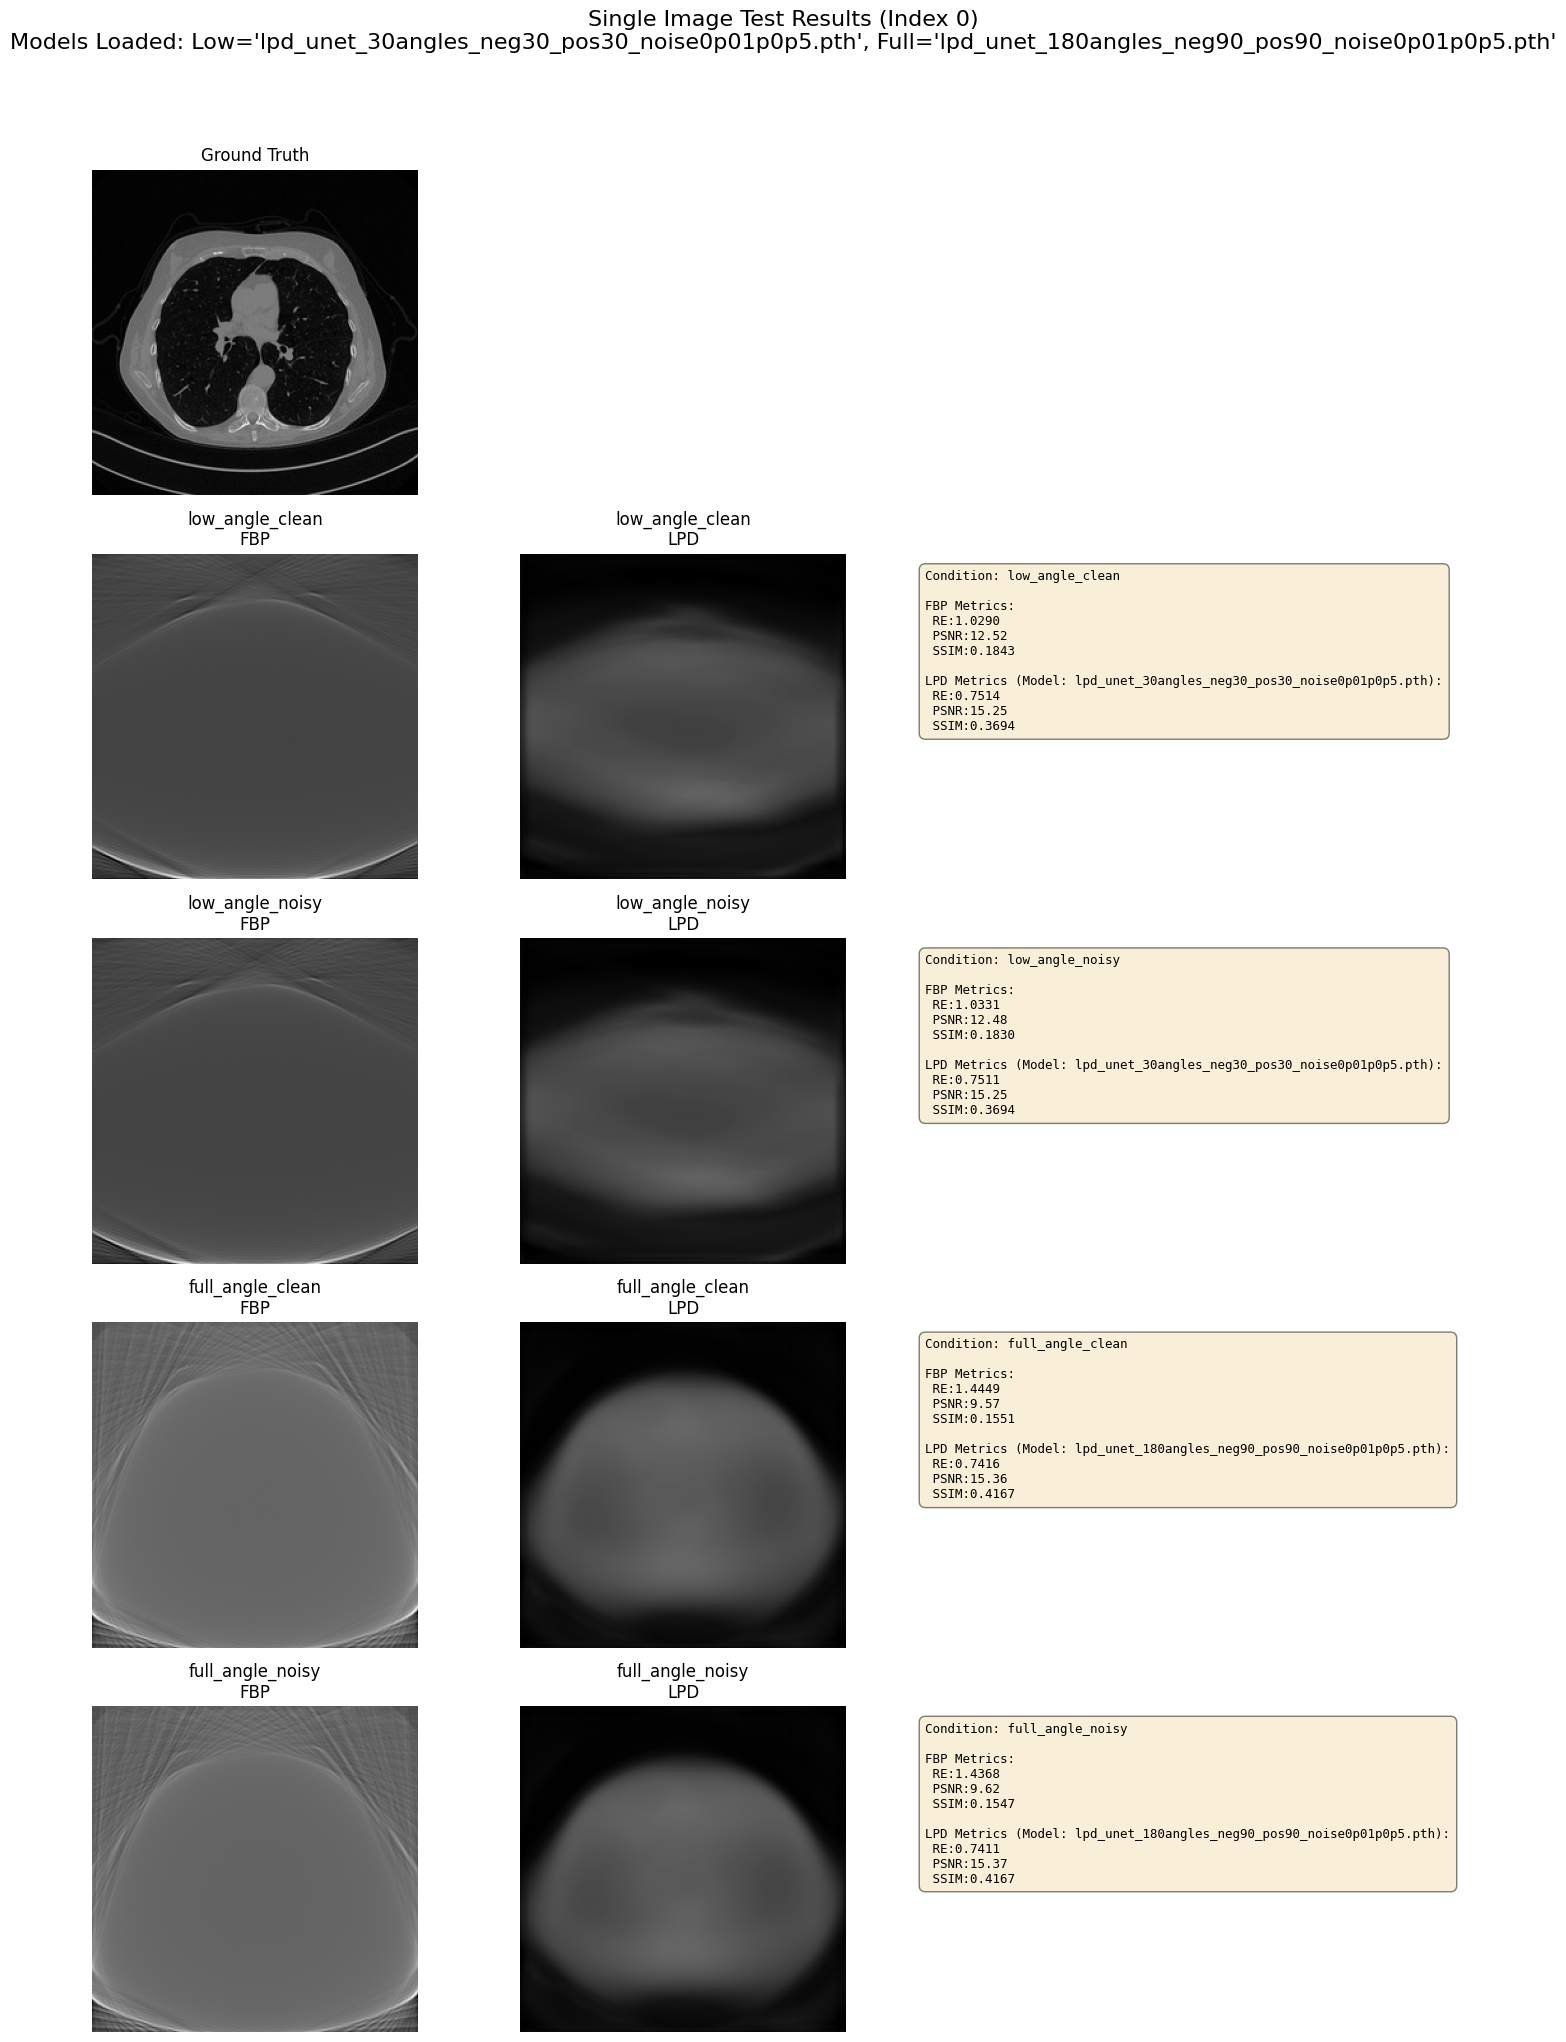

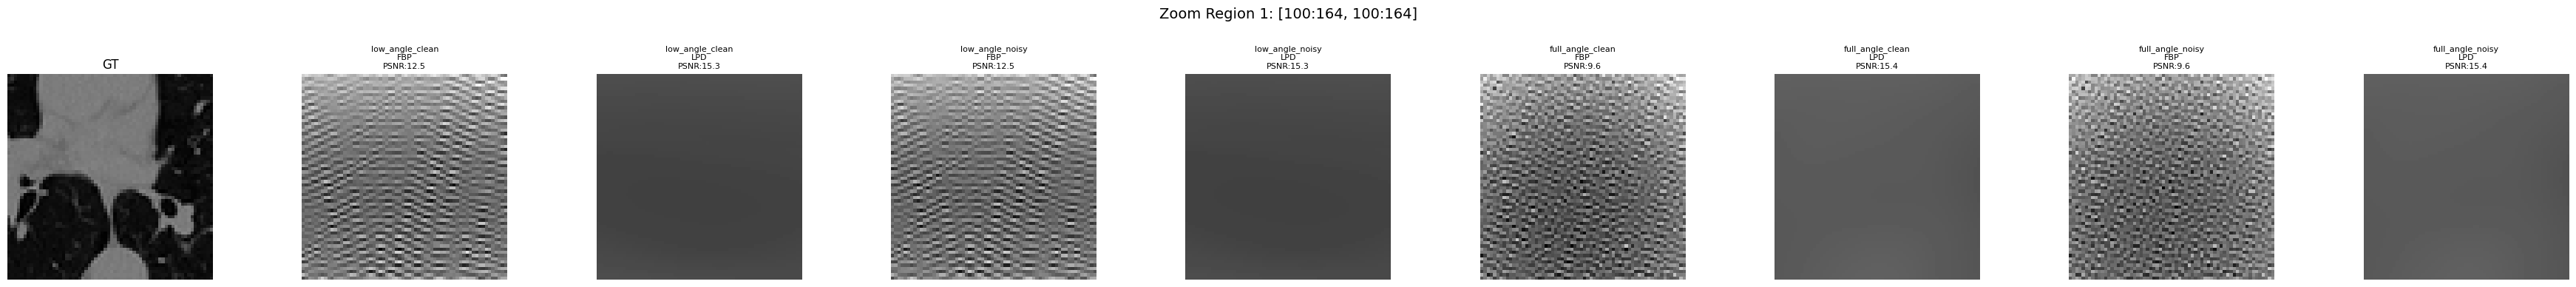

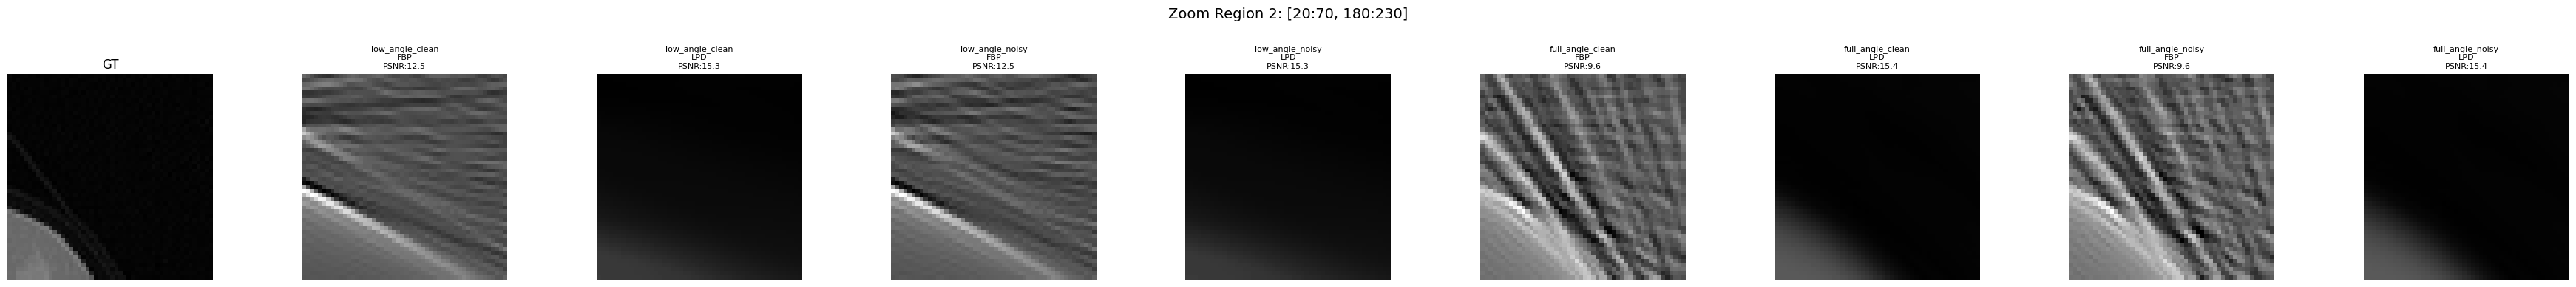


--- Running Full Dataset Average Metrics Test ---
Processed 327/327 batches (327 valid imgs). Avg time/img: 0.25s. ETA: 0.0 min.       
Finished processing 327 images in 82.75 seconds.

--- Average Metrics Across Full Test Dataset (327 images processed) ---
Model Low-Angle: lpd_unet_30angles_neg30_pos30_noise0p01p0p5.pth
Model Full-Angle: lpd_unet_180angles_neg90_pos90_noise0p01p0p5.pth
----------------------------------------------------
  Test Condition Num Samples (LPD/FBP)  LPD RE  LPD PSNR  LPD SSIM  FBP RE  FBP PSNR  FBP SSIM
 low_angle_clean               327/327  0.7087   16.9369    0.4222  1.1507   12.6969    0.2080
 low_angle_noisy               327/327  0.7087   16.9364    0.4221  1.1532   12.6796    0.2068
full_angle_clean               327/327  0.6673   17.4594    0.4950  1.5130   10.2537    0.1857
full_angle_noisy               327/327  0.6670   17.4626    0.4951  1.5187   10.2231    0.1848

Inference script execution finished.


In [15]:
# -*- coding: utf-8 -*-
"""
Script di Inferenza e Valutazione per LPDNet Tomografica - VERSIONE MULTI-MODELLO

Questo script esegue i test richiesti caricando il modello specifico
per la geometria testata (low-angle o full-angle).

1. Testa su geometrie specifiche (30 angoli [-30,30], 180 angoli [-90,90]).
2. Testa con e senza rumore aggiunto (livello 0.01).
3. Calcola metriche RE, PSNR, SSIM.
4. Esegue Punto 3 (opzionale): visualizza risultati per una singola immagine
   per TUTTE E 4 le condizioni di test, usando il modello appropriato per ciascuna.
5. Esegue Punto 4 (opzionale): esegue test sull'intero dataset per TUTTE E 4
   le condizioni di test (usando il modello appropriato) e calcola medie in una tabella.

PREREQUISITI:
- File di checkpoint per ENTRAMBI i modelli LPDNet allenati (low-angle e full-angle).
- Dataset di test ('MajoDataset/test') con le immagini ground truth.
- DEFINIZIONI DELLE CLASSI: (Come prima) Devono essere disponibili
  (importate o copiate/incollate qui sotto).
"""



# =============================================================================
# 0. CONFIGURAZIONE DELL'INFERENZA <<-- MODIFICA QUI !!
# =============================================================================

# --- Specifiche dei Modelli Allenati da Caricare ---
# Devi fornire i parametri usati per allenare SIA il modello low-angle CHE full-angle,
# in modo che lo script possa trovare i rispettivi checkpoint.
# Assumiamo che entrambi siano stati allenati con lo stesso livello/probabilità di rumore,
# altrimenti dovresti rendere anche questi specifici per geometria.
COMMON_TRAINED_NOISE_LEVEL = 0.01  # Livello di rumore usato per allenare ENTRAMBI i modelli
COMMON_TRAINED_NOISE_PROB = 0.5   # Probabilità di rumore usata per allenare ENTRAMBI i modelli


NOISE_LEVEL_IF_APPLIED = 0.01


PROJ_MIN = 0.0
PROJ_MAX = 5.0  # Example maximum

# Calcolo dello standard deviation del rumore effettivo (usato QUANDO si aggiunge rumore)
NOISE_STD_DEV_ACTUAL = NOISE_LEVEL_IF_APPLIED * (PROJ_MAX - PROJ_MIN)



# --- Selezione Modalità di Esecuzione ---
# Imposta a True le modalità che vuoi eseguire. Puoi averle entrambe True.
RUN_SINGLE_IMAGE_DETAIL = True   # Esegue Punto 3
RUN_FULL_DATASET_AVG = True      # Esegue Punto 4

# --- Parametri per Punto 3 (se RUN_SINGLE_IMAGE_DETAIL = True) ---
SELECTED_IMAGE_INDEX = 0
ZOOM_REGIONS = [
    (100, 164, 100, 164),
    (20, 70, 180, 230)
]

# --- Parametri Generali ---
RECO_SIZE = 256
PROJ_MIN = 0.0
PROJ_MAX = 5.0
TEST_NOISE_FRACTION = 0.01

# Percorso base per cercare i checkpoint salvati
DRIVE_BASE_DIR = '/content/drive/MyDrive/Colab_Checkpoints'
DEFAULT_LOCAL_DIR = '.'


# =============================================================================
# --- INIZIO SCRIPT ---
# =============================================================================

# --- Monta Google Drive ---
drive_mounted = False
try:
    from google.colab import drive
    drive.mount('/content/drive'); drive_mounted = True; print("Drive montato.")
except: print("Drive non montato o errore. Cerco localmente.")

# --- Device Configuration ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# --- Funzione per costruire path checkpoint ---
def get_checkpoint_path(geometry_mode, noise_level, noise_prob):
    if geometry_mode == 'low_angle': geometry_tag = "30angles_neg30_pos30"
    elif geometry_mode == 'full_angle': geometry_tag = "180angles_neg90_pos90"
    else: raise ValueError(f"Invalid geometry_mode: {geometry_mode}")
    noise_tag = f"noise{noise_level:.2f}p{noise_prob:.1f}".replace('.', 'p')
    config_name = f"{geometry_tag}_{noise_tag}"
    checkpoint_subdir = f'LPD_UNET_{config_name}'
    checkpoint_filename = f'lpd_unet_{config_name}.pth'
    path_drive = os.path.join(DRIVE_BASE_DIR, "LPD_UNET", checkpoint_subdir, checkpoint_filename)
    path_local = os.path.join(DEFAULT_LOCAL_DIR, "LPD_UNET", checkpoint_filename)

    if drive_mounted and os.path.exists(path_drive): return path_drive
    elif os.path.exists(path_local): return path_local
    else: return None # Non trovato

# --- Trova i percorsi per ENTRAMBI i modelli ---
CHECKPOINT_PATH_LOW = get_checkpoint_path('low_angle', COMMON_TRAINED_NOISE_LEVEL, COMMON_TRAINED_NOISE_PROB)
CHECKPOINT_PATH_FULL = get_checkpoint_path('full_angle', COMMON_TRAINED_NOISE_LEVEL, COMMON_TRAINED_NOISE_PROB)

if CHECKPOINT_PATH_LOW is None: print("!!! ERRORE: Checkpoint per 'low_angle' non trovato!"); exit()
if CHECKPOINT_PATH_FULL is None: print("!!! ERRORE: Checkpoint per 'full_angle' non trovato!"); exit()


# Definisci spazi e geometria ODL
reco_space = odl.uniform_discr(
    [-RECO_SIZE/2]*2, [RECO_SIZE/2]*2, [RECO_SIZE, RECO_SIZE], dtype='float32'
)


# Crea operatori ODL RayTransform e Adjoint
# Gestione backend ASTRA (CUDA preferito, poi CPU, poi fallback ODL)
try:
    ray_trafo_odl = odl.tomo.RayTransform(reco_space, geometry, impl='astra_cuda')
    print("Using ASTRA CUDA backend.")
except Exception as e_cuda:
    print(f"ASTRA CUDA backend failed ({e_cuda}), trying ASTRA CPU...")
    try:
        ray_trafo_odl = odl.tomo.RayTransform(reco_space, geometry, impl='astra_cpu')
        print("Using ASTRA CPU backend.")
    except Exception as e_cpu:
        print(f"ASTRA CPU backend failed ({e_cpu}), falling back to ODL default implementation.")
        ray_trafo_odl = odl.tomo.RayTransform(reco_space, geometry)

back_proj_odl = ray_trafo_odl.adjoint


back_proj = OperatorModule(back_proj_odl).to(device)



# =============================================================================
# FUNZIONI HELPER
# =============================================================================

def load_model(checkpoint_path, device):
    """Carica UN modello LPDNet da UN checkpoint."""
    print(f"Loading model weights from: {checkpoint_path}")
    # Definisci i parametri GLOBALI PRIMA di istanziare il modello.
    # !!! ASSUNZIONE CRITICA: Si assume che ENTRAMBI i modelli (low e full)
    # siano stati allenati con gli stessi iperparametri di rete (N_ITER, N_PRIMAL, etc.).
    # Se non è così, questa logica deve cambiare per caricare i parametri corretti
    # per ciascun modello, magari leggendoli dal checkpoint se salvati lì.
    global N_ITER, N_PRIMAL, N_DUAL, N_FEATURES, UNET_DEPTH, KERNEL_SIZE, RECO_SIZE
    N_ITER = 5
    N_PRIMAL = 5
    N_DUAL = 5
    KERNEL_SIZE = (3, 3)
    N_FEATURES = 16
    UNET_DEPTH = 1
    # Istanzia modello
    model = LearnedPrimalDualNet().to(device)
    try:
        checkpoint = torch.load(checkpoint_path, map_location=device)
        model.load_state_dict(checkpoint['model_state_dict'])
        model.eval() # Modalità valutazione
        print(f"Model from {os.path.basename(checkpoint_path)} loaded successfully.")
        return model
    except Exception as e:
        print(f"!!! Error loading model state_dict from {checkpoint_path}: {e}"); exit()

# Le altre funzioni helper (define_odl_geometry, generate_sinogram,
# calculate_metrics, run_fbp, plot_results) rimangono INVARIATE rispetto
# alla versione precedente, poiché operano su dati passati come argomenti.

# Copio qui le funzioni helper per completezza
def define_odl_geometry(num_angles, angle_range_deg, reco_size):
    angle_min_rad = np.deg2rad(angle_range_deg[0]); angle_max_rad = np.deg2rad(angle_range_deg[1])
    detector_pixels = int(reco_size * np.sqrt(2))
    reco_space = odl.uniform_discr([-reco_size/2]*2, [reco_size/2]*2, [reco_size, reco_size], dtype='float32')
    angle_partition = odl.uniform_partition(angle_min_rad, angle_max_rad, num_angles)
    detector_partition = odl.uniform_partition(-detector_pixels/2, detector_pixels/2, detector_pixels)
    geometry = odl.tomo.Parallel2dGeometry(angle_partition, detector_partition)
    try: ray_trafo_odl = odl.tomo.RayTransform(reco_space, geometry, impl='astra_cuda')
    except:
         try: ray_trafo_odl = odl.tomo.RayTransform(reco_space, geometry, impl='astra_cpu')
         except: ray_trafo_odl = odl.tomo.RayTransform(reco_space, geometry)

    ray_trafo_module = OperatorModule(ray_trafo_odl).to(device)
    back_proj_odl = ray_trafo_odl.adjoint
    back_proj_module = OperatorModule(back_proj_odl).to(device)
    # print(f"Defined ODL geometry: {num_angles} angles [{angle_range_deg[0]}°, {angle_range_deg[1]}°]")
    return reco_space, geometry, ray_trafo_odl, back_proj_odl, ray_trafo_module, back_proj_module

def generate_sinogram(gt_image_np, ray_trafo_odl, reco_space, noise_std_dev=0.0, proj_min=0.0, proj_max=5.0):
    gt_image_np = np.clip(gt_image_np, 0.0, 1.0)
    odl_phantom = reco_space.element(gt_image_np.astype(np.float32))
    sinogram = ray_trafo_odl(odl_phantom).asarray().astype(np.float32)
    if noise_std_dev > 0: sinogram += np.random.normal(0, noise_std_dev, sinogram.shape).astype(np.float32)
    sg_min, sg_max = proj_min, proj_max
    if sg_max - sg_min < 1e-8: sinogram_normalized = np.zeros_like(sinogram)
    else: sinogram_normalized = (sinogram - sg_min) / (sg_max - sg_min)
    sinogram_normalized = np.clip(sinogram_normalized, 0.0, 1.0)
    if np.isnan(sinogram_normalized).any() or np.isinf(sinogram_normalized).any():
        print("WARN: NaN/Inf in generated sinogram."); sinogram_normalized = np.nan_to_num(sinogram_normalized, nan=0.0, posinf=1.0, neginf=0.0)
    return torch.from_numpy(sinogram_normalized).unsqueeze(0).unsqueeze(0)

def calculate_metrics(img_true, img_pred):
    assert img_true.shape == img_pred.shape; img_pred = np.clip(img_pred, 0.0, 1.0)
    norm_diff = np.linalg.norm(img_true - img_pred); norm_true = np.linalg.norm(img_true)
    re = norm_diff / norm_true if norm_true > 1e-8 else 0.0
    try: psnr_val = psnr(img_true, img_pred, data_range=1.0)
    except: psnr_val = -np.inf
    try:
        win_size = min(7, img_true.shape[0], img_true.shape[1]); win_size = max(3, win_size if win_size % 2 != 0 else win_size - 1)
        ssim_val = ssim(img_true, img_pred, data_range=1.0, channel_axis=None, win_size=win_size)
    except: ssim_val = -1.0
    return re, psnr_val, ssim_val

def run_fbp(sinogram_tensor, ray_trafo_odl, proj_min=0.0, proj_max=5.0, clip_output=True):
    sino_np_norm = sinogram_tensor.squeeze().cpu().numpy()
    sino_np_phys = sino_np_norm * (proj_max - proj_min) + proj_min
    sino_odl = ray_trafo_odl.range.element(sino_np_phys.astype(np.float32))
    try:
        fbp_op = odl.tomo.fbp_op(ray_trafo_odl, filter_type='Ram-Lak', frequency_scaling=0.8)
        fbp_recon = fbp_op(sino_odl).asarray()
        fbp_min, fbp_max = fbp_recon.min(), fbp_recon.max()
        if fbp_max - fbp_min > 1e-8: fbp_norm = (fbp_recon - fbp_min) / (fbp_max - fbp_min)
        else: fbp_norm = np.zeros_like(fbp_recon)
        if clip_output: fbp_norm = np.clip(fbp_norm, 0.0, 1.0)
        return fbp_norm
    except Exception as e: print(f"Error FBP: {e}"); return np.zeros(ray_trafo_odl.domain.shape, dtype=np.float32)

def plot_results(results_dict, title, zoom_regions):
    num_conditions = len(results_dict)
    n_cols = 3; n_rows = num_conditions + 1
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows + 1), squeeze=False)
    fig.suptitle(title, fontsize=16, y=0.99)
    gt = results_dict.get(list(results_dict.keys())[0], {}).get('gt')
    if gt is not None: axes[0, 0].imshow(gt, cmap='gray', vmin=0, vmax=1); axes[0, 0].set_title("Ground Truth"); axes[0, 0].axis('off')
    axes[0, 1].axis('off'); axes[0, 2].axis('off')
    row_idx = 1
    for condition_name, results in results_dict.items():
         fbp=results.get('fbp_recon'); lpd=results.get('lpd_recon'); metrics_fbp=results.get('metrics_fbp'); metrics_lpd=results.get('metrics_lpd')
         ax_fbp=axes[row_idx, 0]; ax_lpd=axes[row_idx, 1]; ax_txt=axes[row_idx, 2]
         if fbp is not None: ax_fbp.imshow(fbp, cmap='gray'); ax_fbp.set_title(f"{condition_name}\nFBP"); ax_fbp.axis('off')
         else: ax_fbp.axis('off')
         if lpd is not None: ax_lpd.imshow(lpd, cmap='gray', vmin=0, vmax=1); ax_lpd.set_title(f"{condition_name}\nLPD"); ax_lpd.axis('off')
         else: ax_lpd.axis('off')
         ax_txt.axis('off'); text_content = f"Condition: {condition_name}\n"
         # Recupera info modello usato per LPD (aggiunto nel main loop sotto)
         model_used = results.get('model_used', 'N/A')
         if metrics_fbp: text_content += f"\nFBP Metrics:\n RE:{metrics_fbp[0]:.4f}\n PSNR:{metrics_fbp[1]:.2f}\n SSIM:{metrics_fbp[2]:.4f}\n"
         if metrics_lpd: text_content += f"\nLPD Metrics (Model: {os.path.basename(model_used)}):\n RE:{metrics_lpd[0]:.4f}\n PSNR:{metrics_lpd[1]:.2f}\n SSIM:{metrics_lpd[2]:.4f}"
         ax_txt.text(0.05, 0.95, text_content, transform=ax_txt.transAxes, fontsize=9, va='top', family='monospace', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))
         row_idx += 1
    plt.tight_layout(rect=[0, 0.02, 1, 0.96]); plt.show()
    if gt is not None and zoom_regions:
         for i, (y1, y2, x1, x2) in enumerate(zoom_regions):
              num_zoom_cols = 2 * num_conditions + 1
              fig_zoom, axes_zoom = plt.subplots(1, num_zoom_cols, figsize=(4*num_zoom_cols, 4), squeeze=False)
              fig_zoom.suptitle(f"Zoom Region {i+1}: [{y1}:{y2}, {x1}:{x2}]", fontsize=14, y=0.98)
              axes_zoom[0, 0].imshow(gt[y1:y2, x1:x2], cmap='gray', vmin=0, vmax=1); axes_zoom[0, 0].set_title("GT"); axes_zoom[0, 0].axis('off')
              col_idx = 1
              for condition_name, results in results_dict.items():
                   fbp=results.get('fbp_recon'); lpd=results.get('lpd_recon'); metrics_fbp=results.get('metrics_fbp',[-1]*3); metrics_lpd=results.get('metrics_lpd',[-1]*3)
                   if fbp is not None: axes_zoom[0, col_idx].imshow(fbp[y1:y2, x1:x2], cmap='gray'); axes_zoom[0, col_idx].set_title(f"{condition_name}\nFBP\nPSNR:{metrics_fbp[1]:.1f}", fontsize=8); axes_zoom[0, col_idx].axis('off')
                   else: axes_zoom[0, col_idx].axis('off')
                   col_idx += 1
                   if lpd is not None: axes_zoom[0, col_idx].imshow(lpd[y1:y2, x1:x2], cmap='gray', vmin=0, vmax=1); axes_zoom[0, col_idx].set_title(f"{condition_name}\nLPD\nPSNR:{metrics_lpd[1]:.1f}", fontsize=8); axes_zoom[0, col_idx].axis('off')
                   else: axes_zoom[0, col_idx].axis('off')
                   col_idx += 1
              plt.tight_layout(rect=[0, 0.02, 1, 0.92]); plt.show()

# =============================================================================
# MAIN EXECUTION
# =============================================================================

# --- Carica ENTRAMBI i Modelli Allenati ---
print("\n--- Loading Trained Models ---")
# Assicurati che le definizioni delle classi siano state inserite/importate sopra!
lpd_model_low = load_model(CHECKPOINT_PATH_LOW, device)
lpd_model_full = load_model(CHECKPOINT_PATH_FULL, device)
print("----------------------------")

# --- Definisci Condizioni di Test (4 combinazioni) ---
test_conditions = {
    "low_angle_clean":  {'angles': 30,  'range_deg': [-30, 30], 'noise_std': 0.0,                  'model_to_use': lpd_model_low,  'model_path': CHECKPOINT_PATH_LOW},
    "low_angle_noisy":  {'angles': 30,  'range_deg': [-30, 30], 'noise_std': NOISE_STD_DEV_ACTUAL, 'model_to_use': lpd_model_low,  'model_path': CHECKPOINT_PATH_LOW},
    "full_angle_clean": {'angles': 30, 'range_deg': [-15, 15], 'noise_std': 0.0,                  'model_to_use': lpd_model_full, 'model_path': CHECKPOINT_PATH_FULL},
    "full_angle_noisy": {'angles': 30, 'range_deg': [-15, 15], 'noise_std': NOISE_STD_DEV_ACTUAL, 'model_to_use': lpd_model_full, 'model_path': CHECKPOINT_PATH_FULL},
}
print(f"Defined Test Conditions: {list(test_conditions.keys())}")

# --- Carica Dataset di Test ---
# Usa la geometria e operatore TEMPORANEI solo per l'init del Dataset
test_data_dir = os.path.join('MajoDataset','test') # Assicurati che il path sia corretto
if not os.path.isdir(test_data_dir): raise FileNotFoundError(f"Test data directory not found: {test_data_dir}")
print(f"Initializing Dataset with temporary operator: {ray_trafo_odl}")
test_ds = MayoPngDataset(test_data_dir, reco_space, ray_trafo_odl, # Passa l'op temporaneo
                         noise_probability=COMMON_TRAINED_NOISE_PROB, # Passa anche gli altri args richiesti da __init__
                         noise_std_dev=NOISE_STD_DEV_ACTUAL, # Anche se poi useremo noise_std dalle 'test_conditions'
                         proj_min=PROJ_MIN, proj_max=PROJ_MAX, reco_size=RECO_SIZE)

if len(test_ds) == 0: raise ValueError("Test dataset is empty or failed to load.")
# Il DataLoader userà la collate_fn definita che gestisce le tuple
test_loader = DataLoader(test_ds, batch_size=1, shuffle=False, num_workers=0, collate_fn=collate_skip_none)
print(f"Test dataset loaded: {len(test_ds)} images found.")

# --- ESECUZIONE PUNTO 3: IMMAGINE SINGOLA (Usa Modello Corretto) ---
if RUN_SINGLE_IMAGE_DETAIL:
    print(f"\n--- Running Single Image Detail Test (Index: {SELECTED_IMAGE_INDEX}) ---")
    if SELECTED_IMAGE_INDEX >= len(test_ds):
        print(f"!!! Error: SELECTED_IMAGE_INDEX out of range.")
    else:
        try:
            # Recupera la TUPLE (sino, gt) dal dataset
            sample_tuple = test_ds[SELECTED_IMAGE_INDEX]
            if sample_tuple is None:
                 raise ValueError(f"Failed to load image {SELECTED_IMAGE_INDEX}")

            # Estrai SOLO il tensore GT dalla tupla (è il secondo elemento)
            # Il sinogramma nella tupla (sample_tuple[0]) viene ignorato qui,
            # perché ne genereremo uno nuovo per ogni condizione di test.
            gt_tensor_single = sample_tuple[1]

            # Converti GT in numpy (ora gt_tensor_single è un tensore)
            gt_np_single = gt_tensor_single.squeeze().cpu().numpy() # Aggiunto .cpu() per sicurezza
            print(f"Loaded GT image shape: {gt_np_single.shape}")

            # Verifica forma GT
            if gt_np_single.shape != (RECO_SIZE, RECO_SIZE):
                print(f"WARN: Expected GT shape {(RECO_SIZE, RECO_SIZE)}, but got {gt_np_single.shape}. Resizing might be needed or check dataset.")
                # Potrebbe essere necessario un resize qui se il dataset non lo fa correttamente
                # gt_np_single = np.array(Image.fromarray(gt_np_single).resize((RECO_SIZE, RECO_SIZE), Image.Resampling.LANCZOS))

            single_image_results = {}

            # Itera sulle 4 condizioni di test
            for condition_name, params in test_conditions.items():
                print(f"\nProcessing Condition: {condition_name} for single image...")
                # SELEZIONA IL MODELLO CORRETTO PER QUESTA CONDIZIONE
                current_model = params['model_to_use']
                current_model_path = params['model_path']
                print(f"  Using model: {os.path.basename(current_model_path)}")

                # 1. Definisci geometria ODL test SPECIFICA per questa condizione
                # 1. Definisci geometria ODL e OTTIENI I MODULI OPERATORI CORRETTI
                reco_space_test, geometry_test, ray_trafo_odl_test, back_proj_odl_test, \
                ray_trafo_module_test, back_proj_module_test = define_odl_geometry( # <-- Scompatta i nuovi valori
                    params['angles'], params['range_deg'], RECO_SIZE
                )
                print(f"   Defined test geometry: {params['angles']} angles [{params['range_deg'][0]}°, {params['range_deg'][1]}°]")

                # 2. Genera sinogramma test (usa ray_trafo_odl_test)
                sinogram_test_tensor = generate_sinogram(
                    gt_np_single,
                    ray_trafo_odl_test, # Usa l'operatore ODL corretto
                    reco_space_test,
                    noise_std_dev=params['noise_std'],
                    proj_min=PROJ_MIN, proj_max=PROJ_MAX
                ).to(device)
                print(f"   Generated test sinogram shape: {sinogram_test_tensor.shape}")

                # 3. Inferenza LPD (PASSA I MODULI OPERATORI CORRETTI)
                start_time = time.time()
                with torch.no_grad():
                    lpd_recon_tensor = current_model(sinogram_test_tensor,
                                                    ray_trafo_module_test, # <-- Passa operatore K
                                                    back_proj_module_test) # <-- Passa operatore K*
                lpd_time = time.time() - start_time
                lpd_recon_np = torch.clamp(lpd_recon_tensor, 0.0, 1.0).squeeze().cpu().numpy()
                print(f"   LPD Inference time: {lpd_time:.3f} s, Output shape: {lpd_recon_np.shape}")

                # 4. FBP (Usa l'operatore ODL corretto)
                start_time = time.time()
                fbp_recon_np = run_fbp(sinogram_test_tensor, ray_trafo_odl_test, proj_min=PROJ_MIN, proj_max=PROJ_MAX)
                fbp_time = time.time() - start_time
                print(f"   FBP Reconstruction time: {fbp_time:.3f} s, Output shape: {fbp_recon_np.shape}")

                # 5. Metriche
                # Assicurati che GT e reco abbiano la stessa shape prima delle metriche
                if gt_np_single.shape != lpd_recon_np.shape: print(f"WARN: Shape mismatch GT {gt_np_single.shape} vs LPD {lpd_recon_np.shape}"); continue
                if gt_np_single.shape != fbp_recon_np.shape: print(f"WARN: Shape mismatch GT {gt_np_single.shape} vs FBP {fbp_recon_np.shape}"); continue

                metrics_lpd = calculate_metrics(gt_np_single, lpd_recon_np)
                metrics_fbp = calculate_metrics(gt_np_single, fbp_recon_np)
                print(f"  Metrics LPD (RE, PSNR, SSIM): {metrics_lpd[0]:.4f}, {metrics_lpd[1]:.2f}, {metrics_lpd[2]:.4f}")
                print(f"  Metrics FBP (RE, PSNR, SSIM): {metrics_fbp[0]:.4f}, {metrics_fbp[1]:.2f}, {metrics_fbp[2]:.4f}")

                # 6. Salva risultati
                single_image_results[condition_name] = {
                    'gt': gt_np_single, 'lpd_recon': lpd_recon_np, 'fbp_recon': fbp_recon_np,
                    'metrics_lpd': metrics_lpd, 'metrics_fbp': metrics_fbp,
                    'model_used': current_model_path # Salva path modello usato
                }
            # 7. Visualizza (dopo aver processato tutte le condizioni per l'immagine)
            if single_image_results: # Controlla se ci sono risultati da plottare
                 plot_title = f"Single Image Test Results (Index {SELECTED_IMAGE_INDEX})\nModels Loaded: Low='{os.path.basename(CHECKPOINT_PATH_LOW)}', Full='{os.path.basename(CHECKPOINT_PATH_FULL)}'"
                 plot_results(single_image_results, plot_title, ZOOM_REGIONS)
            else:
                 print("No results generated for single image test.")

        except Exception as e: print(f"!!! Error during single image test: {e}"); import traceback; traceback.print_exc()


# --- ESECUZIONE PUNTO 4: MEDIA SU TUTTO IL DATASET (Usa Modello Corretto) ---
if RUN_FULL_DATASET_AVG:
    print(f"\n--- Running Full Dataset Average Metrics Test ---")
    all_metrics = {name: {'lpd_re': [], 'lpd_psnr': [], 'lpd_ssim': [], 'fbp_re': [], 'fbp_psnr': [], 'fbp_ssim': []} for name in test_conditions}
    num_images_processed = 0; image_processing_times = []
    total_start_time = time.time()

    # Itera sulle immagini: il loader ritorna batch di tuple: (batch_sino, batch_gt)
    for i, batch_data in enumerate(test_loader):
        batch_start_time = time.time()
        if batch_data is None:
            print(f"Skipping empty batch {i}.")
            continue # Batch vuoto a causa di errori filtrati

        # Estrai il batch di GT dalla tupla (è il secondo elemento)
        gt_batch = batch_data[1]

        # Estrai il singolo tensore GT dal batch (assumendo batch_size=1)
        if gt_batch.shape[0] != 1:
             print(f"WARN: Expected batch size 1, but got {gt_batch.shape[0]} for GT batch. Processing only first element.")
             # Potresti voler gestire batch > 1 o dare errore
        gt_tensor_single = gt_batch[0] # Prende il primo elemento del batch GT


        # Converti in numpy
        gt_np_single = gt_tensor_single.squeeze().cpu().numpy() # Questo è ora il GT corretto (RECO_SIZE, RECO_SIZE)
        print(f"Processing image {i+1}/{len(test_ds)}... GT shape: {gt_np_single.shape}", end='\r')
        if gt_np_single.shape != (RECO_SIZE, RECO_SIZE): continue # Skip immagine se shape errata

        # Verifica forma GT anche qui
        if gt_np_single.shape != (RECO_SIZE, RECO_SIZE):
            print(f"\nWARN: Image {i+1}: Expected GT shape {(RECO_SIZE, RECO_SIZE)}, got {gt_np_single.shape}. Skipping this image.")
            continue

        # Itera sulle condizioni di test
        for condition_name, params in test_conditions.items():
            # SELEZIONA MODELLO CORRETTO
            current_model = params['model_to_use']

            reco_space_test, geometry_test, ray_trafo_odl_test, back_proj_odl_test, \
                ray_trafo_module_test, back_proj_module_test = define_odl_geometry( # <-- Scompatta i nuovi valori
                    params['angles'], params['range_deg'], RECO_SIZE
                )

            # 2. Genera sinogramma test (usa GT corretto e geometria/rumore specifici)
            sinogram_test_tensor = generate_sinogram(
                gt_np_single, # GT numpy 2D
                ray_trafo_odl_test, # Usa l'operatore ODL corretto
                reco_space_test, # Spazio della geometria test
                noise_std_dev=params['noise_std'],
                proj_min=PROJ_MIN, proj_max=PROJ_MAX
            ).to(device)

            # 3. Inferenza LPD (PASSA I MODULI OPERATORI CORRETTI)
            lpd_recon_np = None # Inizializza a None
            try:
                with torch.no_grad():
                    lpd_recon_tensor = current_model(sinogram_test_tensor,
                                                      ray_trafo_module_test, # <-- Passa operatore K
                                                      back_proj_module_test) # <-- Passa operatore K*
                lpd_recon_np = torch.clamp(lpd_recon_tensor, 0.0, 1.0).squeeze().cpu().numpy()
            except Exception as lpd_err:
                print(f"\nERROR during LPD inference for img {i+1}, condition {condition_name}: {lpd_err}. Skipping LPD.")
                # Non impostare lpd_recon_np = None qui, è già None

            # 4. FBP (Usa l'operatore ODL corretto)
            fbp_recon_np = None # Inizializza a None
            try:
                fbp_recon_np = run_fbp(sinogram_test_tensor, ray_trafo_odl_test, proj_min=PROJ_MIN, proj_max=PROJ_MAX)
            except Exception as fbp_err:
                print(f"\nERROR during FBP for img {i+1}, condition {condition_name}: {fbp_err}. Skipping FBP.")
                # Non impostare fbp_recon_np = None qui, è già None


            # 5. Calcola e accumula metriche (SOLO se le ricostruzioni sono valide)
            try:
                metrics_lpd, metrics_fbp = (np.nan, np.nan, np.nan), (np.nan, np.nan, np.nan) # Default a NaN
                valid_lpd = lpd_recon_np is not None and lpd_recon_np.shape == gt_np_single.shape
                valid_fbp = fbp_recon_np is not None and fbp_recon_np.shape == gt_np_single.shape

                if valid_lpd:
                     metrics_lpd = calculate_metrics(gt_np_single, lpd_recon_np)
                     all_metrics[condition_name]['lpd_re'].append(metrics_lpd[0])
                     all_metrics[condition_name]['lpd_psnr'].append(metrics_lpd[1])
                     all_metrics[condition_name]['lpd_ssim'].append(metrics_lpd[2])
                else: # Appendi NaN se LPD non è valido
                     all_metrics[condition_name]['lpd_re'].append(np.nan)
                     all_metrics[condition_name]['lpd_psnr'].append(np.nan)
                     all_metrics[condition_name]['lpd_ssim'].append(np.nan)


                if valid_fbp:
                     metrics_fbp = calculate_metrics(gt_np_single, fbp_recon_np)
                     all_metrics[condition_name]['fbp_re'].append(metrics_fbp[0])
                     all_metrics[condition_name]['fbp_psnr'].append(metrics_fbp[1])
                     all_metrics[condition_name]['fbp_ssim'].append(metrics_fbp[2])
                else: # Appendi NaN se FBP non è valido
                     all_metrics[condition_name]['fbp_re'].append(np.nan)
                     all_metrics[condition_name]['fbp_psnr'].append(np.nan)
                     all_metrics[condition_name]['fbp_ssim'].append(np.nan)

            except Exception as metric_err:
                 print(f"\nWARN: Metric calculation failed: Img {i+1}, Cond {condition_name}. Err: {metric_err}")
                 # Appendi NaN se c'è un errore nel calcolo stesso
                 if valid_lpd: all_metrics[condition_name]['lpd_re'].append(np.nan); all_metrics[condition_name]['lpd_psnr'].append(np.nan); all_metrics[condition_name]['lpd_ssim'].append(np.nan)
                 if valid_fbp: all_metrics[condition_name]['fbp_re'].append(np.nan); all_metrics[condition_name]['fbp_psnr'].append(np.nan); all_metrics[condition_name]['fbp_ssim'].append(np.nan)

        # Fine loop condizioni
        num_images_processed += 1 # Incrementa DOPO aver processato tutte le condizioni per l'immagine
        image_processing_times.append(time.time() - batch_start_time)
        if (i+1) % 20 == 0 or (i+1) == len(test_loader): # Stampa ETA e all'ultima immagine
            avg_time_per_image = np.mean(image_processing_times) if image_processing_times else 0
            remaining_batches = len(test_loader)-(i+1)
            eta_seconds = remaining_batches*avg_time_per_image
            eta_minutes = eta_seconds/60
            print(f"Processed {i+1}/{len(test_loader)} batches ({num_images_processed} valid imgs). Avg time/img: {avg_time_per_image:.2f}s. ETA: {eta_minutes:.1f} min.       ", end='\r')

    # Fine loop immagini
    total_time = time.time() - total_start_time
    print(f"\nFinished processing {num_images_processed} images in {total_time:.2f} seconds.")

    # --- Calcola e Stampa Medie in Tabella ---
    avg_results = []
    print(f"\n--- Average Metrics Across Full Test Dataset ({num_images_processed} images processed) ---")
    print(f"Model Low-Angle: {os.path.basename(CHECKPOINT_PATH_LOW)}")
    print(f"Model Full-Angle: {os.path.basename(CHECKPOINT_PATH_FULL)}")
    print("----------------------------------------------------")

    for condition_name, metrics in all_metrics.items():
        # Filtra NaN prima di calcolare la media
        valid_lpd_re   = [r for r in metrics['lpd_re']   if np.isfinite(r)]
        valid_lpd_psnr = [p for p in metrics['lpd_psnr'] if np.isfinite(p)]
        valid_lpd_ssim = [s for s in metrics['lpd_ssim'] if np.isfinite(s)]
        valid_fbp_re   = [r for r in metrics['fbp_re']   if np.isfinite(r)]
        valid_fbp_psnr = [p for p in metrics['fbp_psnr'] if np.isfinite(p)]
        valid_fbp_ssim = [s for s in metrics['fbp_ssim'] if np.isfinite(s)]

        # Conteggia campioni validi per ogni metrica (potrebbero differire se alcuni calcoli falliscono)
        num_valid_lpd = len(valid_lpd_re) # Assumiamo che se RE è valido, gli altri lo sono (o sono NaN)
        num_valid_fbp = len(valid_fbp_re)

        if num_valid_lpd == 0 and num_valid_fbp == 0:
             print(f"Condition: {condition_name} - No valid results.")
             continue

        avg_results.append({
            "Test Condition": condition_name,
            "Num Samples (LPD/FBP)": f"{num_valid_lpd}/{num_valid_fbp}", # Mostra quanti campioni validi per LPD/FBP
            "LPD RE": np.mean(valid_lpd_re) if valid_lpd_re else np.nan,
            "LPD PSNR": np.mean(valid_lpd_psnr) if valid_lpd_psnr else np.nan,
            "LPD SSIM": np.mean(valid_lpd_ssim) if valid_lpd_ssim else np.nan,
            "FBP RE": np.mean(valid_fbp_re) if valid_fbp_re else np.nan,
            "FBP PSNR": np.mean(valid_fbp_psnr) if valid_fbp_psnr else np.nan,
            "FBP SSIM": np.mean(valid_fbp_ssim) if valid_fbp_ssim else np.nan,
        })
    if avg_results:
        df = pd.DataFrame(avg_results)
        pd.set_option('display.precision', 4)
        pd.set_option('display.max_rows', None)
        pd.set_option('display.max_columns', None) # Mostra tutte le colonne
        pd.set_option('display.width', 200) # Larghezza output
        print(df.to_string(index=False, na_rep='NaN')) # Rappresenta NaN esplicitamente
    else: print("No average results could be calculated.")


# --- Messaggio Finale ---
if not RUN_SINGLE_IMAGE_DETAIL and not RUN_FULL_DATASET_AVG:
    print("\nNessuna modalità di esecuzione selezionata.")
print("\nInference script execution finished.")